<h1><center> PPOL 5203 Data Science I: Foundations <br><br> 
<font color='grey'> Data Visualization<br><br>
Tiago Ventura</center> <h1> 

---

###  In this Notebook we cover:

- Data Visualization in Theory
- Grammar of Graphics: 
    - `plotnine`
    - `matplotlib` and `seaborn`


### Summary of this lecture note

As an data scientist, one of the most important skills you need is the ability to make compelling data visualizations to present your work.  A well-thought visualization is always more attractive than a crosstab or numerical results from a statistical model. 

At our DSPP program, you will do a full semester on Data Visualization. For this reason, here we will cover the basics of visualization in Python, both in theory and in practice, but you will learn more in-depth how to work with animations, build dashboards, among other things in the future. 

We will cover Python native libraries for data visualization (`matplotlib` and `seaborn`). However, more attention will be given to `plotnine`, which is a library that brings the `grammar of graphics` framework to Python. Read more [here](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149) about `plotnine`

The `grammar of graphics` provides a well-structure, layered framework to describe and construct visualization from data. We will focus on the `grammar of graphics` for the following practical and theorethical reasons: 

- it provides a intuitive understand about mapping data to visuals
- the layers allows us to build up the graph in well-define steps
- it integrates will with R visualization capabilities

# Setup

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats # for calculating the quantiles for a QQ plot
import requests

# Print all columns from the Pandas DataFrame
pd.set_option('display.max_columns', None) 

# Ignore warnings from Seaborn (specifically, future update warnings)
import warnings
warnings.filterwarnings("ignore")

# Data Visualization in Theory

Let's start with a visualization from my [research](https://www.sciencedirect.com/science/article/abs/pii/S0261379420301219).

### What do you see?

- How many variables?

- How are these variables represented in the figure?

- What are the non-data related information presented in the graph?

<div>
<img src="global_res_no_band.png" width="80%"/>
</div>

## Aesthetics

The key aspect on data visualization is **to take data points** and convert them **visual elements**. 

> All data visualizations map data values into quantifiable features of the resulting graphic. We refer to these features as aesthetics. Fundamentals of Data Visualization, Claus Wilke

Below you can see some commonly used aesthetics in data visualization: 


<br> 

<div>
<img src="https://clauswilke.com/dataviz/aesthetic_mapping_files/figure-html/common-aesthetics-1.png" width="80%"/>
</div>


source: [Fundamentals of Data Visualization, Claus Wilke]()


## Cartesian coordinates system

Most often we will use a 2d cartesian coordinate system to present our graphs. Humans can very easily understand information in two dimensions, and our work will very often consist on mapping data into X and Y axis. 


<br> 

<div>
<img src="https://clauswilke.com/dataviz/coordinate_systems_axes_files/figure-html/cartesian-coord-1.png" width="80%"/>
</div>




## Adding a 3rd, 4th, 5th variable in a 2d space

However, most often, we want to add more variables to a 2d space. For example, we might want to: 

- distinguish discrete items or groups that do not have an intrinsic order
- highlight values that pass a certain threeshold 
- Add a sequential data value in the graph

Those are all data points. If we want to represent them in a 2d graph, we need to map them in new aesthetics. Let's show examples with the a few different aesthethics


## Basic 2d plot

<br>
<div>
<img src="global_no_aes.png" width="80%"/>
</div>

### Color Aesthetics to Distinguish

<br>
<div>
<img src="global_color_to_distinguish.png" width="80%"/>
</div>

### Color Aesthetics to Highlight


<br>
<div>
<img src="global_color_to_highlight.png" width="80%"/>
</div>

### To represent visually a sequence of data points

<br>
<div>
<img src="global_color_to_values.png" width="80%"/>
</div>

## Grammar of Graphics

According to ChatGPT, a "Grammar is the set of structural rules that dictate how words in a language can be combined to form meaningful sentences. These rules determine how phrases and sentences are constructed in a particular language."" 

The **grammar of graphics**, as the name says, brings a similar effort to establish structural rules to data visualizations. This idea of building a **grammar of graphics** was first developed by Leland Wilkinson's book "The Grammar of Graphics".  The **grammar of graphics** is about breaking down graphs into these consistent components, allowing for a systematic and structured approach to creating a wide variety of visualizations. 

One of the most well-known implementations of the **grammar of graphics** is the `ggplot2` package in the R programming language, developed by [Hadley Wickham](https://vita.had.co.nz/papers/layered-grammar.html). `ggplot2` breakes the grammar of graphics layer by layer

Native libraries in Python do not use this framework. However, for the reasons explain before, we will focus on this framework in our class, which has been implemented with the library `plotnine`. `plotnine` offers an emulator for the powerful `ggplot2` graphics package from R


### Major Components of the Grammar of Graphics

 `plotnine`/`ggplot2` graphs have three **key steps** 
 
- **Data Step**: The raw data that you want to plot.

- **Geometries <geom_> step**: The geometric shapes that will represent the data.

- **Aesthetics <aes()> step**: Aesthetics of the geometric and statistical objects, such as position, color, size, shape, and transparency

This all you need to build you graphs. In addition, there are other components you will eventually use to adjust your data visualization

- **Facets**: to produce create subplots based on specific variable

- **annotations**: labels, titles, subtitles, captions.

- **Coordinates & Scales**: some additional functions to adjust aesthetics you are mapping (change colors, size, alpha, scale of x and y coordinates)

- **Theme**: Control the finer presentation details like font size, background color, grid line styles, etc.




## In practice: `plotnine`

Let's first open the gapminder dataset, a subset of the original data set from (http://gapminder.org). For each of 142 countries, it provides values for life expectancy, GDP per capita, and population, every five years, from 1952 to 2007.



In [5]:
import pandas as pd
import numpy as np
from plotnine import * # to imitate ggplot
from gapminder import gapminder # bring data

import warnings
warnings.filterwarnings('ignore') # Ignore warnings

# Read in data 
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [9]:
# create to new log variables
gapminder = (gapminder
       .assign(lngdpPercap = np.log(gapminder["gdpPercap"]), 
               lnpop = np.log(gapminder["pop"]))
      )


## Three key steps with `plotnine`

### `ggplot`(data = `<DATA>`)  

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`))

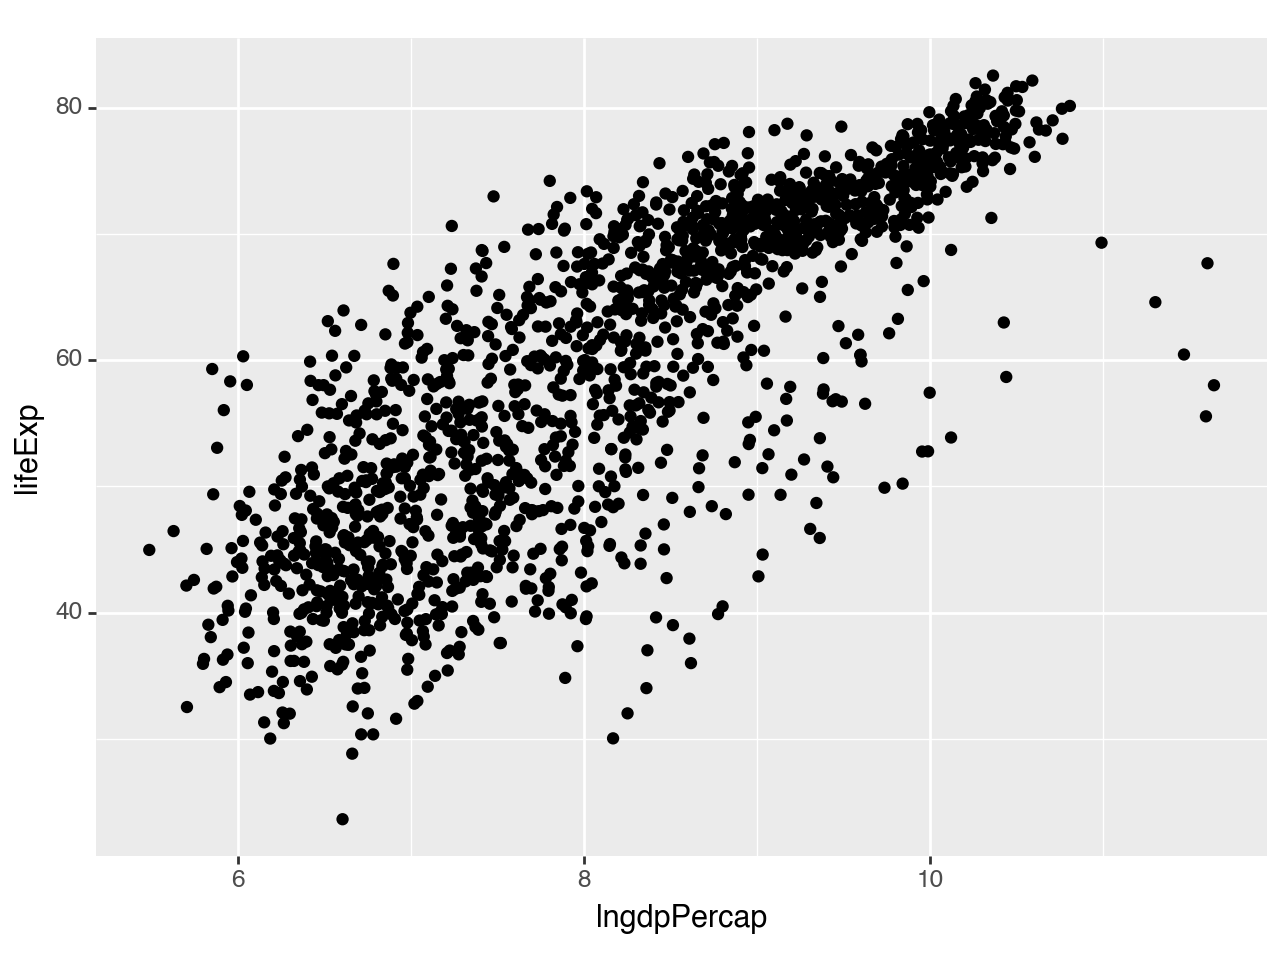

<Figure Size: (640 x 480)>

In [4]:
# build in plotnine graph

# step 1: data
(ggplot(data=gapminder) + 

# step 2: geom
 geom_point(

# step 3: aesthethics
     aes(x="lngdpPercap", y="lifeExp"))
)

### Change the geometric representations


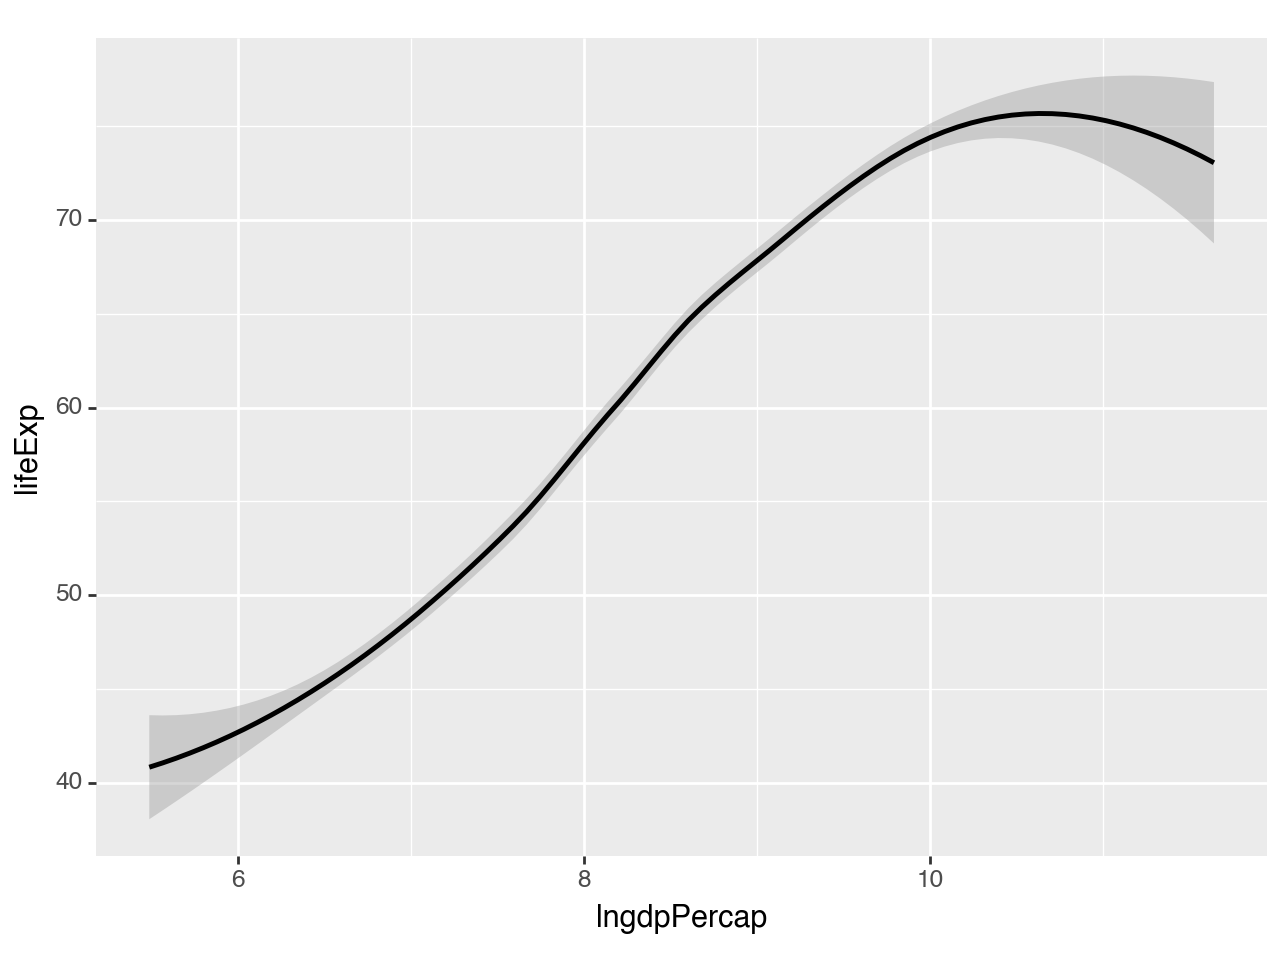

<Figure Size: (640 x 480)>

In [7]:
# you can either easily change the geometric representations
# step 1: data
(ggplot(data=gapminder) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics
     aes(x="lngdpPercap", y="lifeExp"), method='loess')
)

### Combine multiple geometric representations


### `ggplot`(data = `<DATA>`)  

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`))

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`))

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`))

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`))

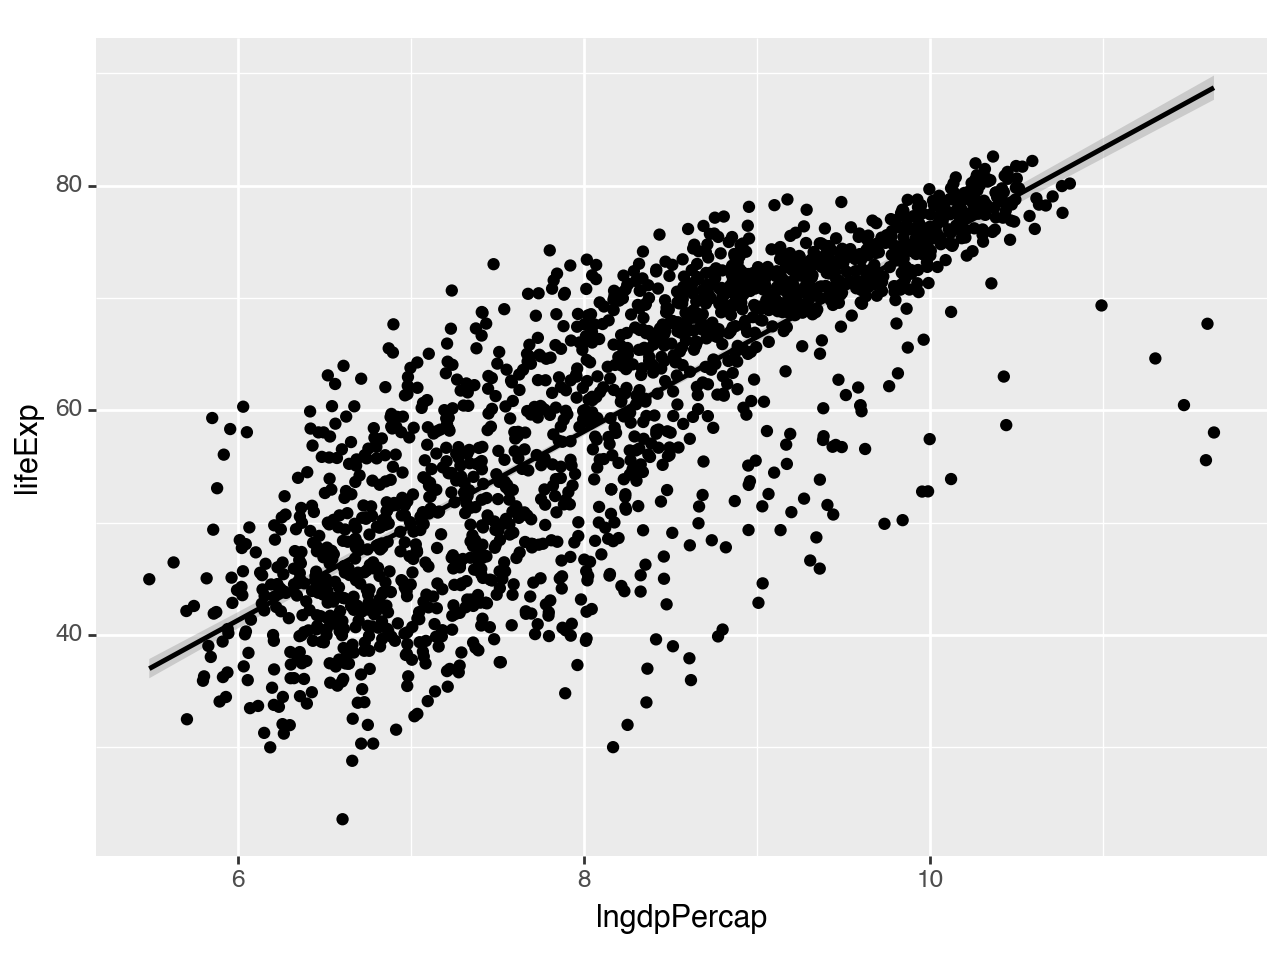

<Figure Size: (640 x 480)>

In [8]:
# you can either easily change the geometric representations
# step 1: data
(ggplot(data=gapminder) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics
     aes(x="lngdpPercap", y="lifeExp")) +
 
# new geometric representation
geom_point(
     aes(x="lngdpPercap", y="lifeExp")) 
 
)

### Aesthetics can be mapped to variables or to scalar values.

### `ggplot`(data = `<DATA>`)  

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`=var), `<aesthethics>`=values )




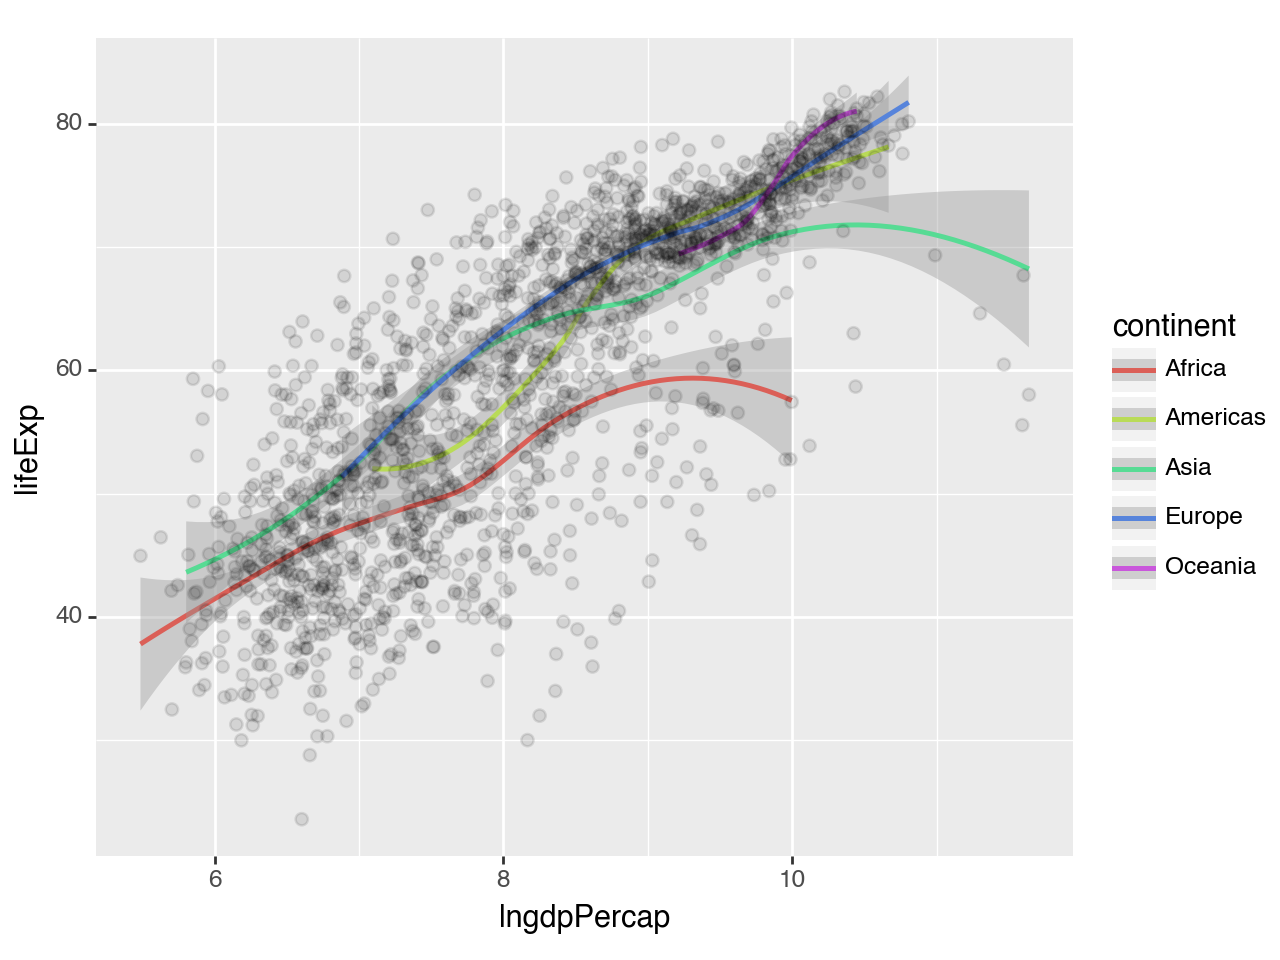

<Figure Size: (640 x 480)>

In [9]:
# you can either easily change the geometric representations
# step 1: data
(ggplot(data=gapminder) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="lngdpPercap", y="lifeExp", color="continent")) +
 
# aesthetics as values
geom_point(
     aes(x="lngdpPercap", y="lifeExp"), color="black",  alpha=.1, size=2, shape="o") 
 
)

## The additional components of **grammar of graphics** with `plotnine`

### `ggplot`(data = `<DATA>`)  

### `+` 

### `geom_<representation>`(aes(`<aesthethics>`)) 


### `+` 

### `scale_<aesthetics>`()


### `+` 

### `theme_<>`


### `+` 

### `facet_<>`

### `+` 

### `labels`


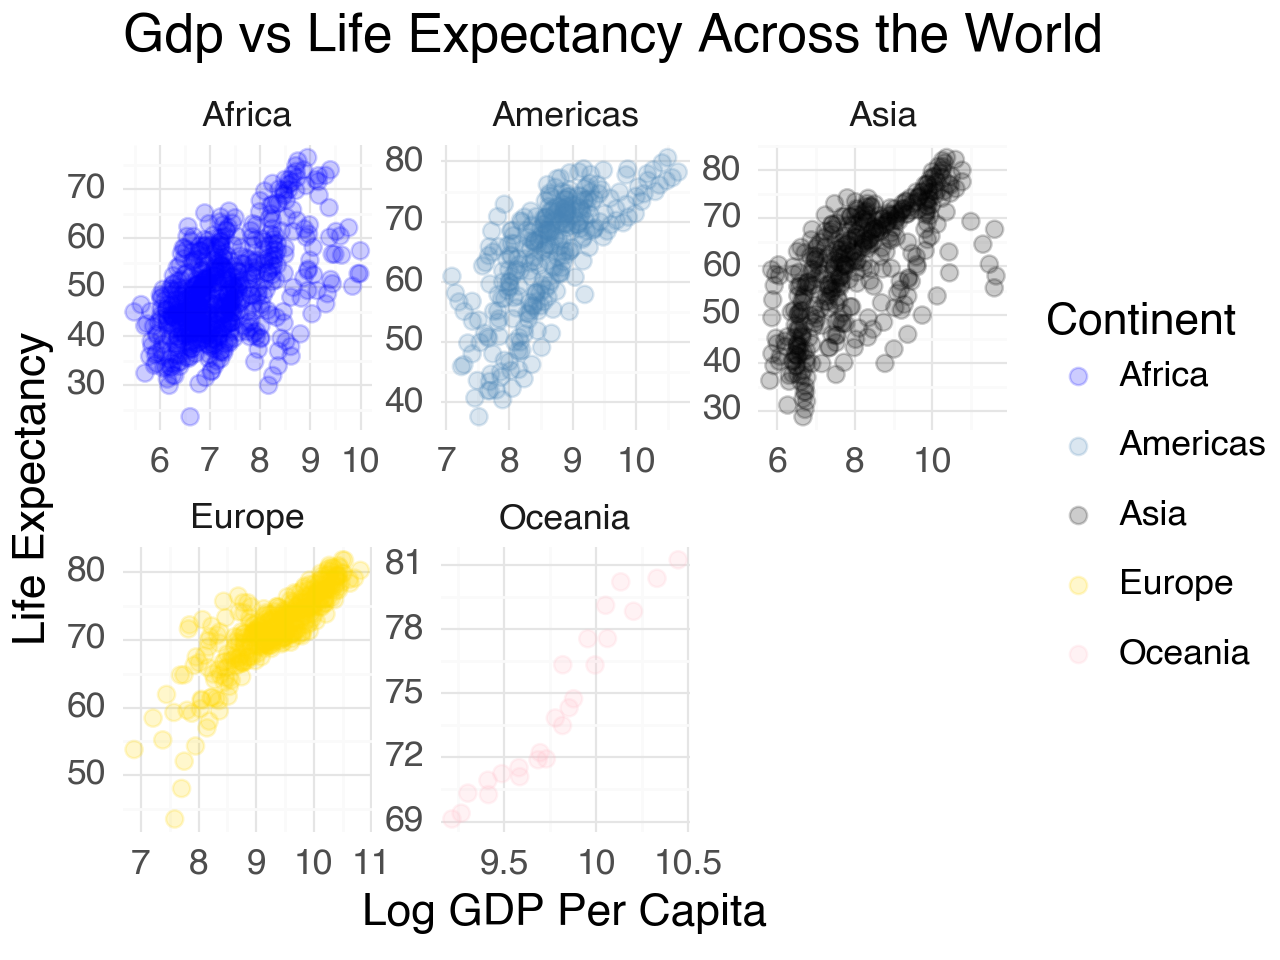

<Figure Size: (640 x 480)>

In [22]:
# step 1: data
(ggplot(data=gapminder) + 

# step 2: geom
 geom_point(

# step 3: aesthethics
     aes(x="lngdpPercap", y="lifeExp", color="continent"), 
        alpha=.2, size=3) +


# step scale: manually edit the aesthetics variables
scale_color_manual(values = ["blue","steelblue","black","gold","pink"], 
                  name="Continent") +

 # step theme: change the overall layout of the graph
theme_minimal(base_size=16) +
 
# step facet: break the graph in subplots
facet_wrap("continent", scales="free") +
 

# step labels: edit the labels of the graph
labs(x="Log GDP Per Capita", y="Life Expectancy", title="Gdp vs Life Expectancy Across the World")
 
)

<div class="alert alert-block alert-danger", style="font-size: 20px;">
<b>Do I need to memorize all of these options? </b></div>

No. You need to learn the fundamental steps and how they work. But, you should be asking yourself, what do I do when I need to build a graph? 

This is how it works for me: 

- Consult the [plotnine's documentation website](https://plotnine.readthedocs.io/en/stable/index.html) for additional guidance and tips on using the API.  

- Check the [library](https://plotnine.readthedocs.io/en/stable/gallery.html) to see graphs you would like to replicate on your work. 

- And get ready to ask google the same question over and over. 

## Native Python Libraries: `matplotlib` + `seaborn`

Outside `plotnine` and the integration of **grammar of graphics** to Python,  Python has its own native visualization tools. 

The most famous are `matplotlib` and `seaborn` (that is actually built based on `matplotlib`)

Because `matplotlib` and `seaborn` are still the most used visualization library in Python, and it is likely you will encounter them as you look through other data scientists' code. Then, we will also cover briefly in class how these libraries work.  

We will use the same `gapminder` data. 

**Disclaimer:** In all honesty, I am a `ggplot/plotnine` person, so I am not really helpful with `matplotlib` questions!

### `matplotlib`

Matplotlib has its own way to built plots. In general, it involves: 

- **step 1**: Create the `plt.figure()` and `plt.axes()` objects 
- **step 2**: Create the visualization with a specifc method using the `plt.axes()` object
- **step 3**: Edit aesthetics with arguments inside of methods
- **step 4**: Edit labels, titles, and overall annotations

Let's see an example: 

In [10]:
# setup
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

gapminder.head()

country continent  year  lifeExp       pop   gdpPercap  lngdpPercap  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314     6.658583   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030     6.710344   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710     6.748878   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138     6.728864   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106     6.606625   

       lnpop  
0  15.946754  
1  16.039154  
2  16.144454  
3  16.261154  
4  16.386554

Text(0.5, 0, 'Life Expectancy')

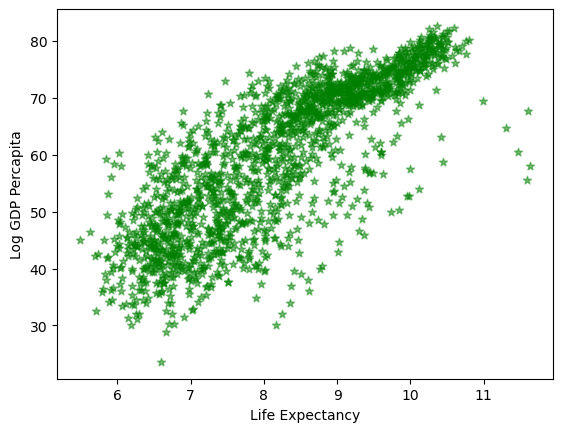

In [11]:
# Matplot lib

# step 1: can be done with `plt.subplots()`
fig, ax = plt.subplots()

# step 2 + step 3
ax.scatter(x = gapminder["lngdpPercap"], y = gapminder["lifeExp"], c="green", alpha=.5, marker="*") 

# step 4
ax.set_ylabel("Log GDP Percapita")
ax.set_xlabel("Life Expectancy")

### `.plt` makes some of these steps unecessary

Text(0, 0.5, 'Life Expectancy')

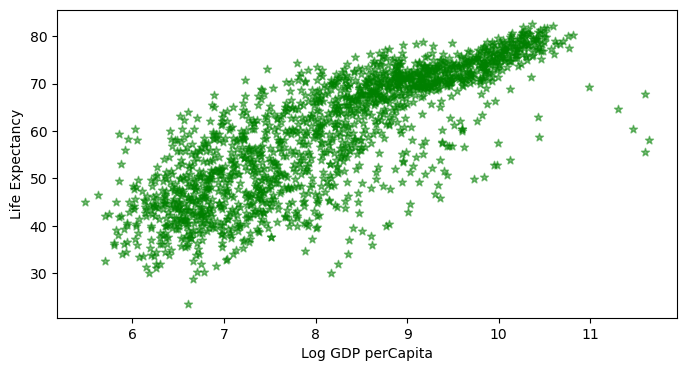

In [12]:
# Using .plt methods to avoid .axes and .figure
plt.figure(figsize=(8,4))
plt.scatter(x = gapminder["lngdpPercap"], y = gapminder["lifeExp"],  c="green", alpha=.5, marker="*") 
plt.xlabel("Log GDP perCapita")
plt.ylabel("Life Expectancy")

### `Seaborn`

`seaborn` is another more traditional Python data visualization library. It is built on top of matplotlib. It offers a higher-level, more attractive interface for creating statistically-informed visualizations. 

Main advantages: 

- graphs are visually more pleasing than `matplotlib`
- built-in themes
- integrates seamlessly with pandas DataFrames

Check the [seaborn official tutorial](https://seaborn.pydata.org/tutorial/introduction.html)

Let's see how it works

Text(0, 0.5, 'Life Expectancy')

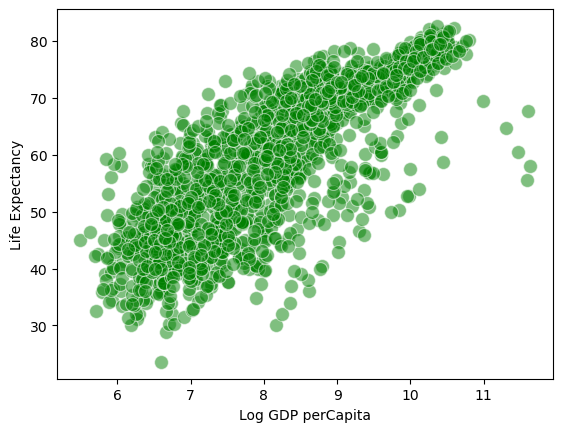

In [14]:
# seaborn
sns.scatterplot(x = "lngdpPercap",y="lifeExp",
                alpha=.5,
                color="green",
                s=100,
                data = gapminder)
plt.xlabel("Log GDP perCapita")
plt.ylabel("Life Expectancy")


**Notice:**

- Data comes as an argument
- Variables are masked
- Other than that, very similar to matplotlib


## Data types drives visualization decisions

|Data Type |	Example	| Scale |
|:-------:|:-------:|:-----:|
Numerical |	1.3, 800, 10e3 |	Continuous
Integer	| 1, 2, 3|	Discrete (when $n$ is small), Continuous (when $n$ is large)
Categorical|	"dog", "Nigeria", "A"|	Discrete
Ordered	|"Small", "Medium", "Large"|	Discrete
Dates/Time |	2009-01-02, 5:32:33 |	Continuous

<br>

### <center> Discrete Values </center>

<div>
<img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/amounts-1.png" width="60%"/>
    <img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/proportions-1.png" width="60%"/>
</div>

### <center> Continuous Values </center>

<div>
<img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/single-distributions-1.png" width="60%"/>
</div>

### <center> Relationships </center>

<div>
<img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/basic-scatter-1.png" width="60%"/>
   <img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/xy-lines-1.png" width="60%"/></div>

## Discrete Values 

<div>
<img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/amounts-1.png" width="60%"/>
    <img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/proportions-1.png" width="60%"/>
</div>

### Univariate Discrete Categorial Data

#### Bar Plots

In [15]:
gapminder

country continent  year  lifeExp       pop   gdpPercap  lngdpPercap  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314     6.658583   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030     6.710344   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710     6.748878   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138     6.728864   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106     6.606625   
...           ...       ...   ...      ...       ...         ...          ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306     6.559838   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786     6.541637   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960     6.675129   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623     6.510316   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298     6.152114   

          lnpop  
0     15.946754  
1     16.039154  
2     16.144454  
3     16.261154  
4     16.386554  
...         ...  
1699  16.036497  
1700  16.186160  
1701  16.249558  
1702  16.294279  
1703  16.326015  

[1704 rows x 8 columns]

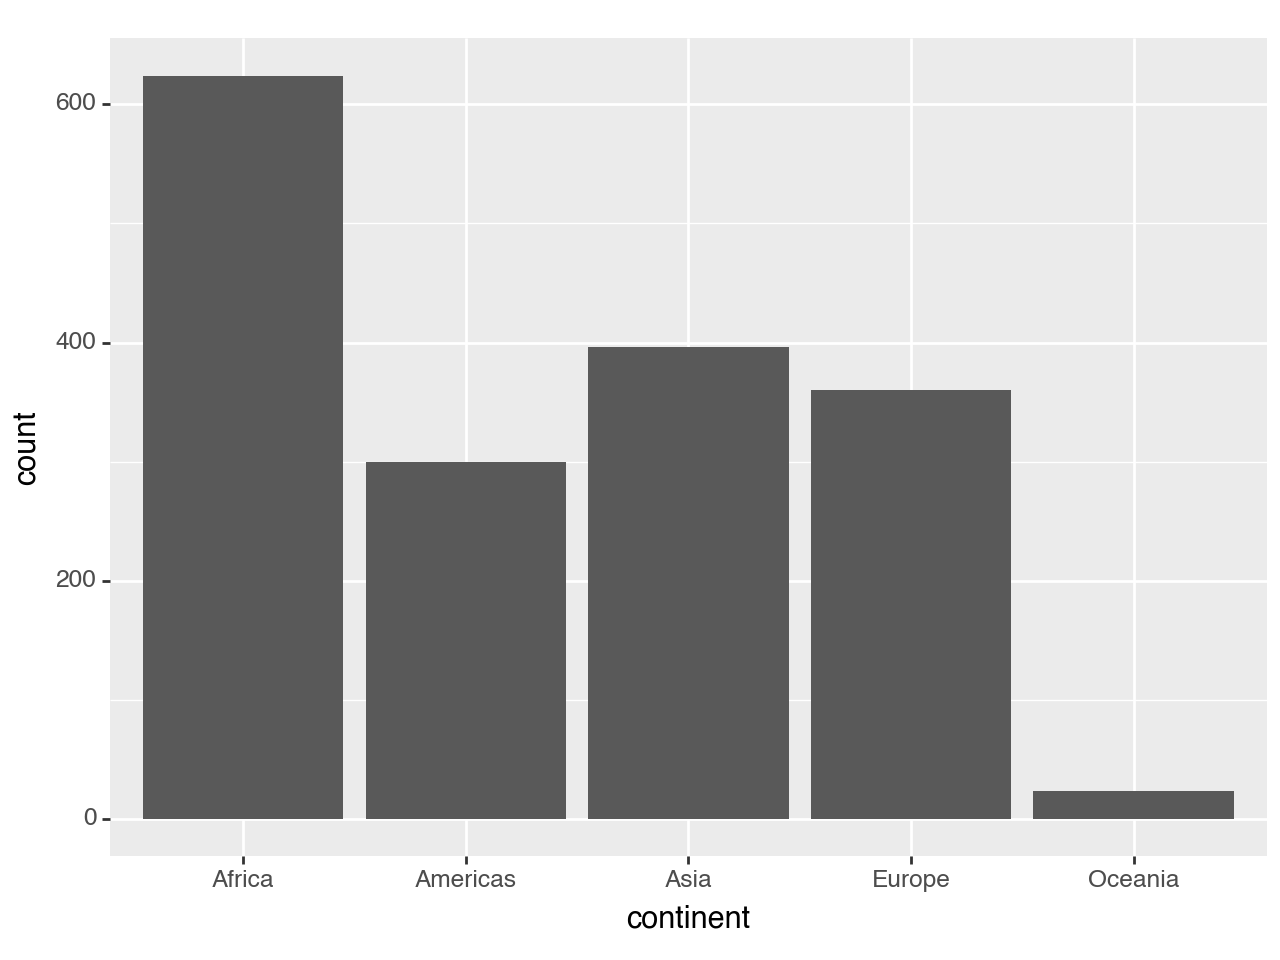

<Figure Size: (640 x 480)>

In [16]:
# plotnine
(ggplot(gapminder,aes(x='continent')) +
  geom_bar())

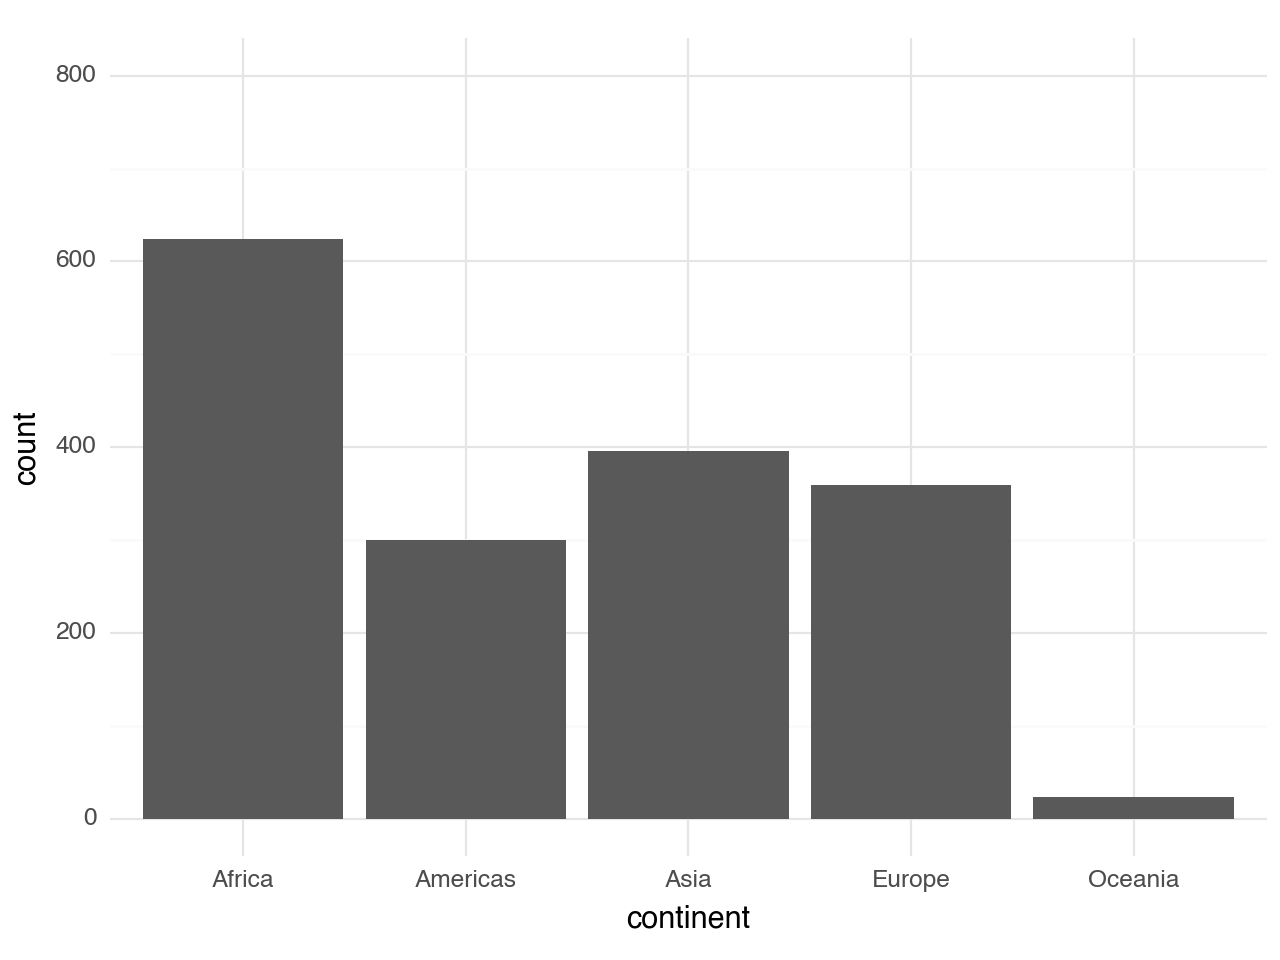

<Figure Size: (640 x 480)>

In [17]:
# Ordering Bar Plot by Frequency
(ggplot(gapminder,aes(x='continent')) +
  geom_bar() +
  scale_x_discrete(limits=["Africa", "Americas", "Asia", "Europe", "Oceania"]) +
  ylim(0, 800) +
  theme_minimal() 
)

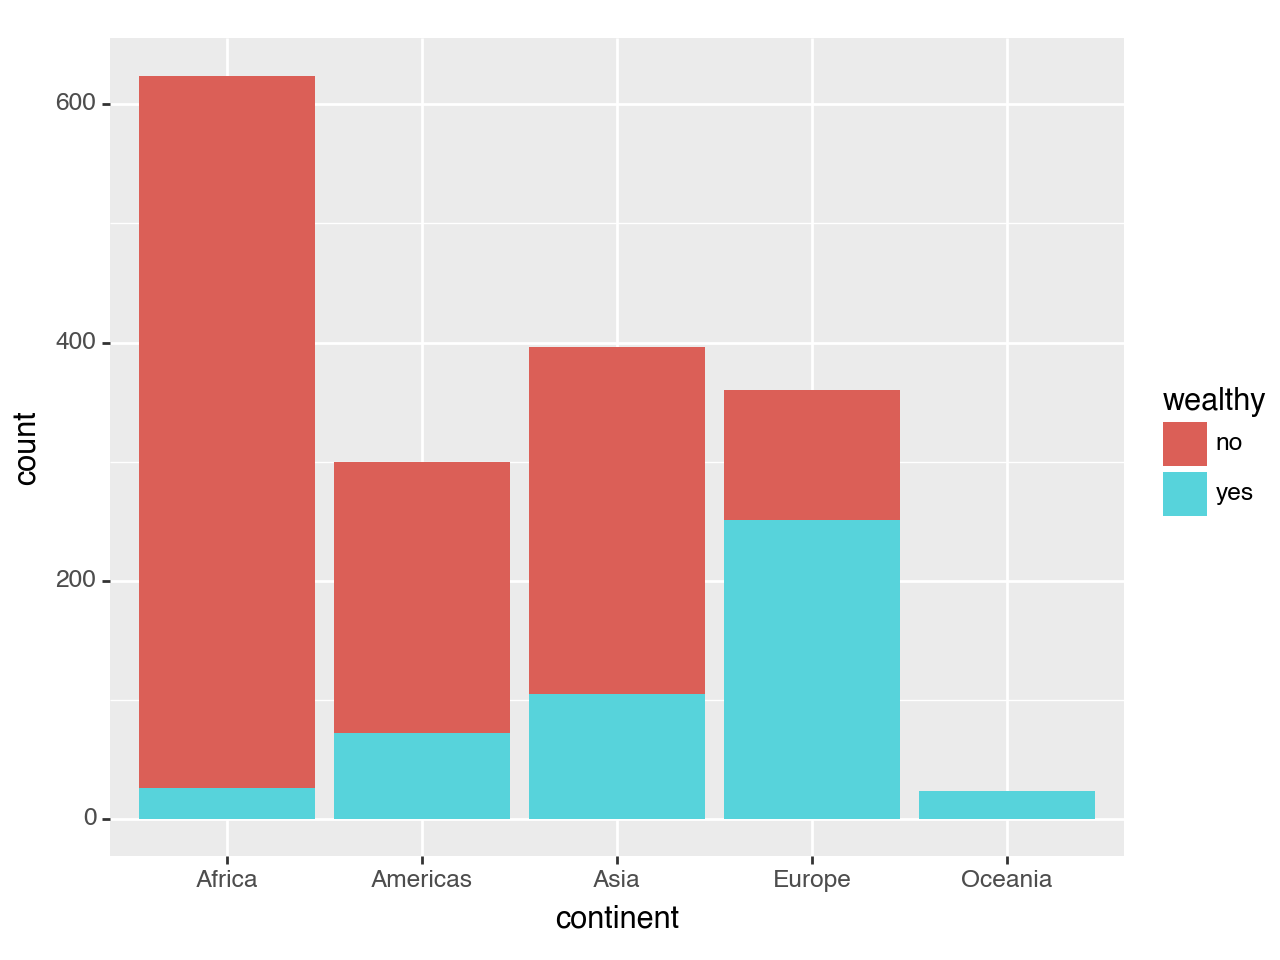

<Figure Size: (640 x 480)>

In [19]:
# create a binary indicator for wealthy countries
gapminder = (gapminder.
                assign(wealthy=np.where(gapminder["lngdpPercap"] > 9,"yes","no")
                      )
            )



## Adding in more categorical data 
(ggplot(gapminder,aes(x='continent',fill='wealthy')) +
  geom_bar() +
  scale_x_discrete(limits=["Africa", "Americas", "Asia", "Europe", "Oceania"]))

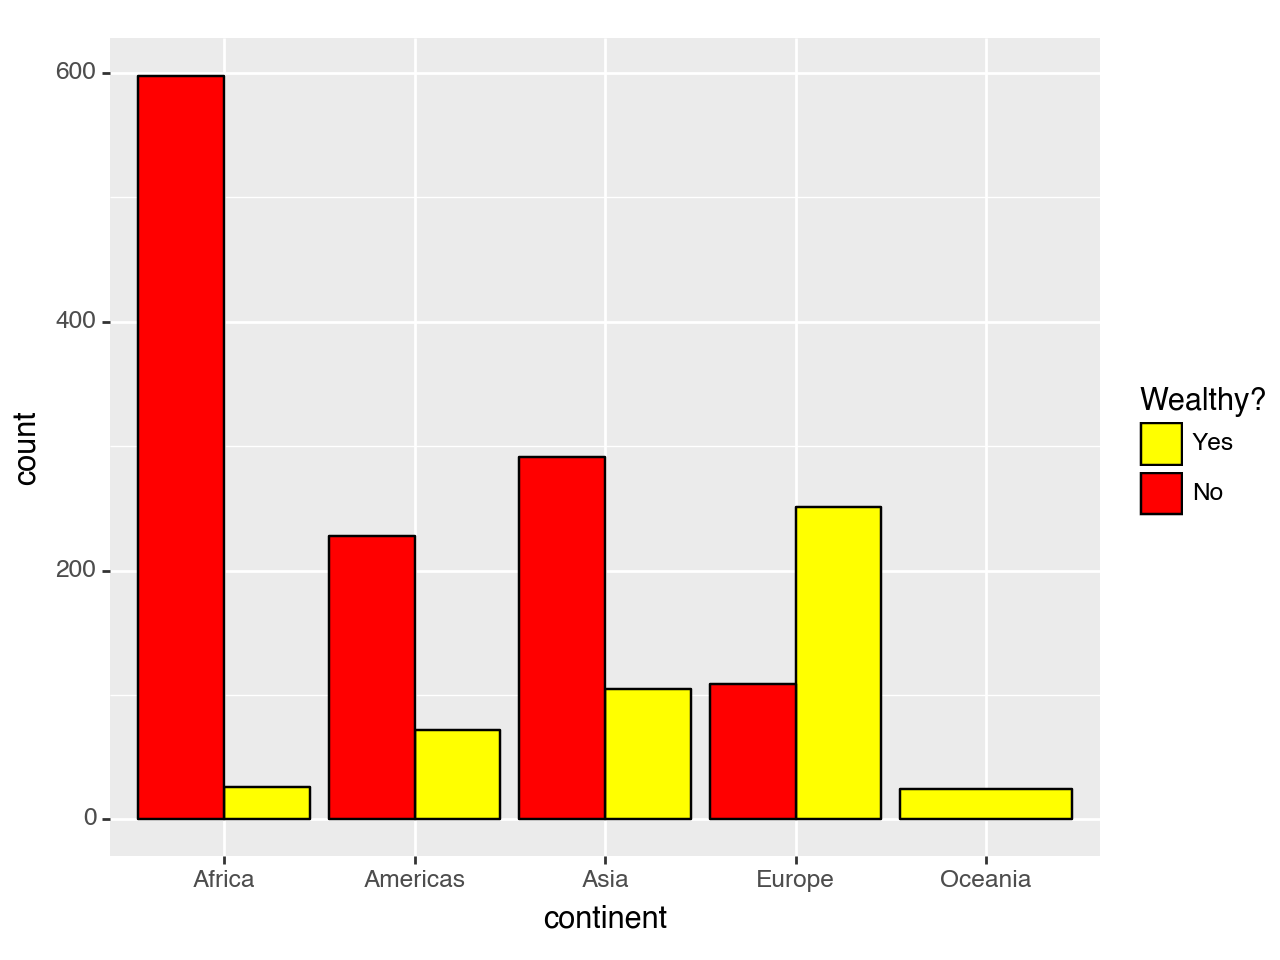

<Figure Size: (640 x 480)>

In [20]:
# Dodge + edit colors
(ggplot(gapminder,aes(x='continent',fill='wealthy')) +
  geom_bar(position="dodge", color="black") +
  scale_x_discrete(limits=["Africa", "Americas", "Asia", "Europe", "Oceania"]) +
  scale_fill_manual(values=["yellow", "red"], 
                    limits=["yes", "no"], 
                    labels=["Yes", "No"], 
                    name="Wealthy?") 
)

#### in Seaborn

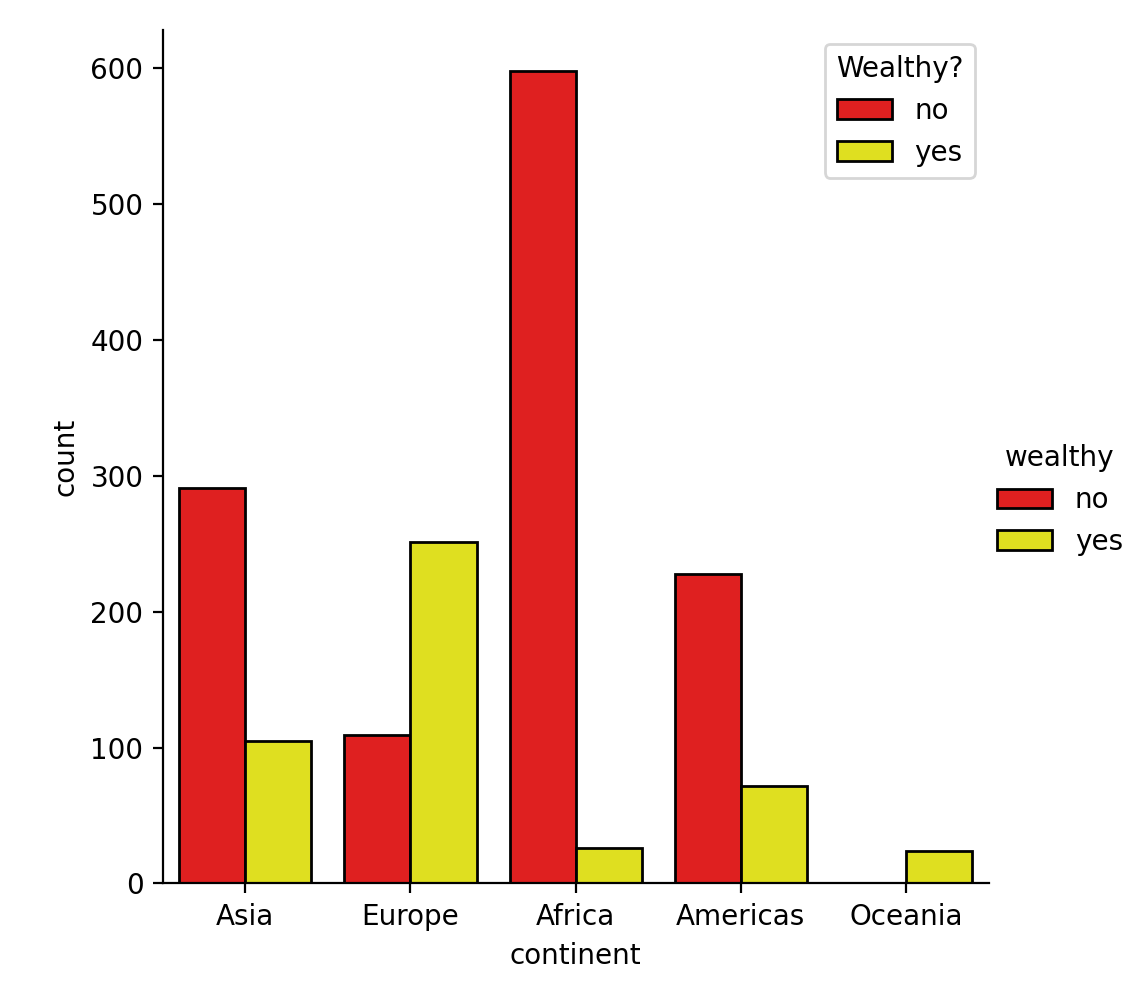

In [21]:
# Create the bar plot
palette = {"yes": "yellow", "no": "red"}

# Seaborn
palette = {"yes": "yellow", "no": "red"}
sns.catplot(x="continent", hue = "wealthy",
            data=gapminder,
            kind="count", 
            palette=palette,
            dodge=True, 
            edgecolor="black")

# Set legend title
plt.legend(title="Wealthy?")


## Point + Uncertainty

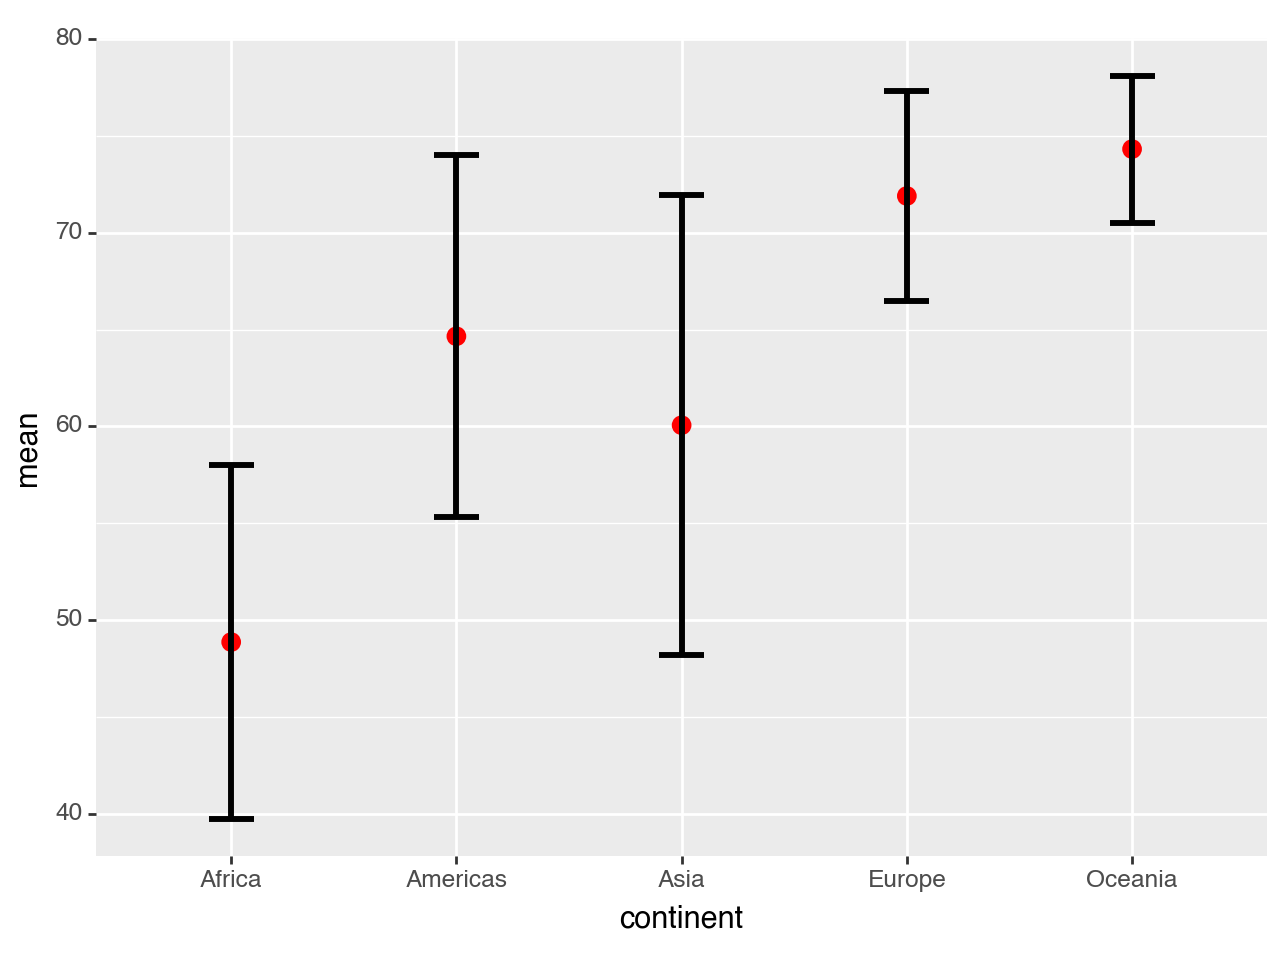

<Figure Size: (640 x 480)>

In [22]:
# plotnine
# Calculate the means and standard errors for lifeExp grouped by continent
grouped = gapminder.groupby('continent')['lifeExp'].agg(['mean', 'std']).reset_index()
grouped['ymin'] = grouped['mean'] - grouped['std']
grouped['ymax'] = grouped['mean'] + grouped['std']

# Plot
(ggplot(grouped, aes(x='continent', y='mean')) 
     + geom_point(color="red", size=3)
     + geom_errorbar(aes( ymin='ymin', ymax='ymax'), width=.2, size=1.2)
)
 

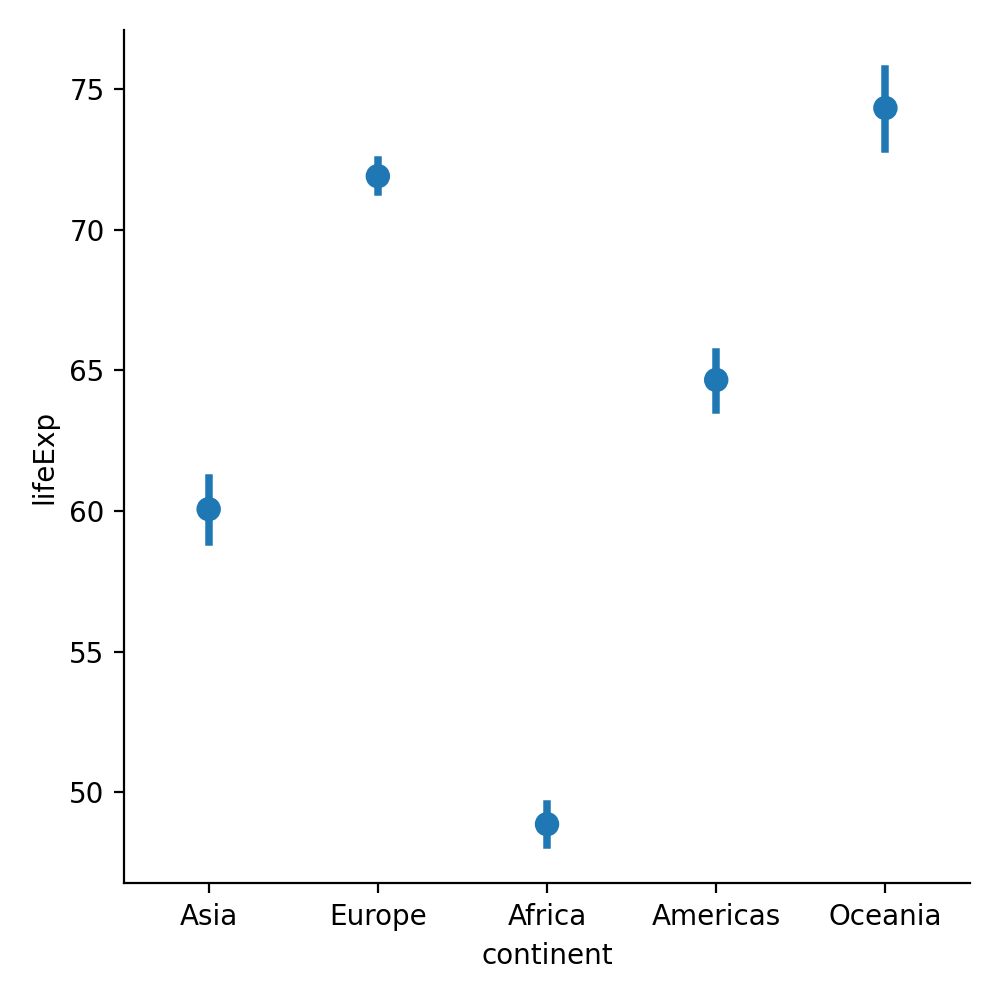

In [24]:
# seaborn catplot method
sns.catplot(x="continent",
            y="lifeExp", 
            data=gapminder,
            kind="point",
            join=False) # discuss the difference between join=True, and join=False

### Bivariate: category on continuous

#### Box plot

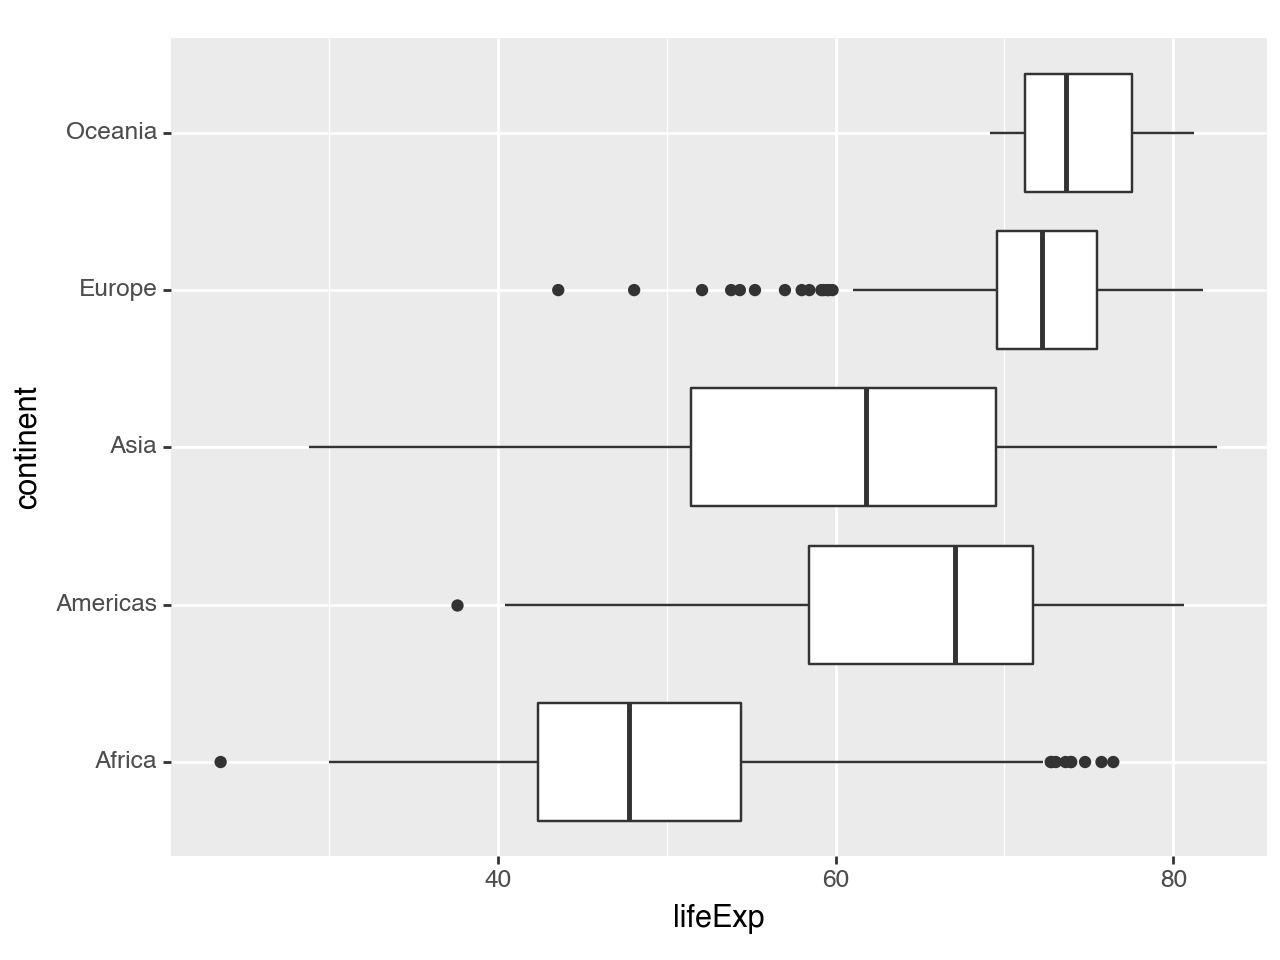

<Figure Size: (640 x 480)>

In [51]:
# plotnine
(ggplot(gapminder,aes(x='continent',y = 'lifeExp')) +
  geom_boxplot() +
  coord_flip())

<Axes: xlabel='lifeExp', ylabel='continent'>

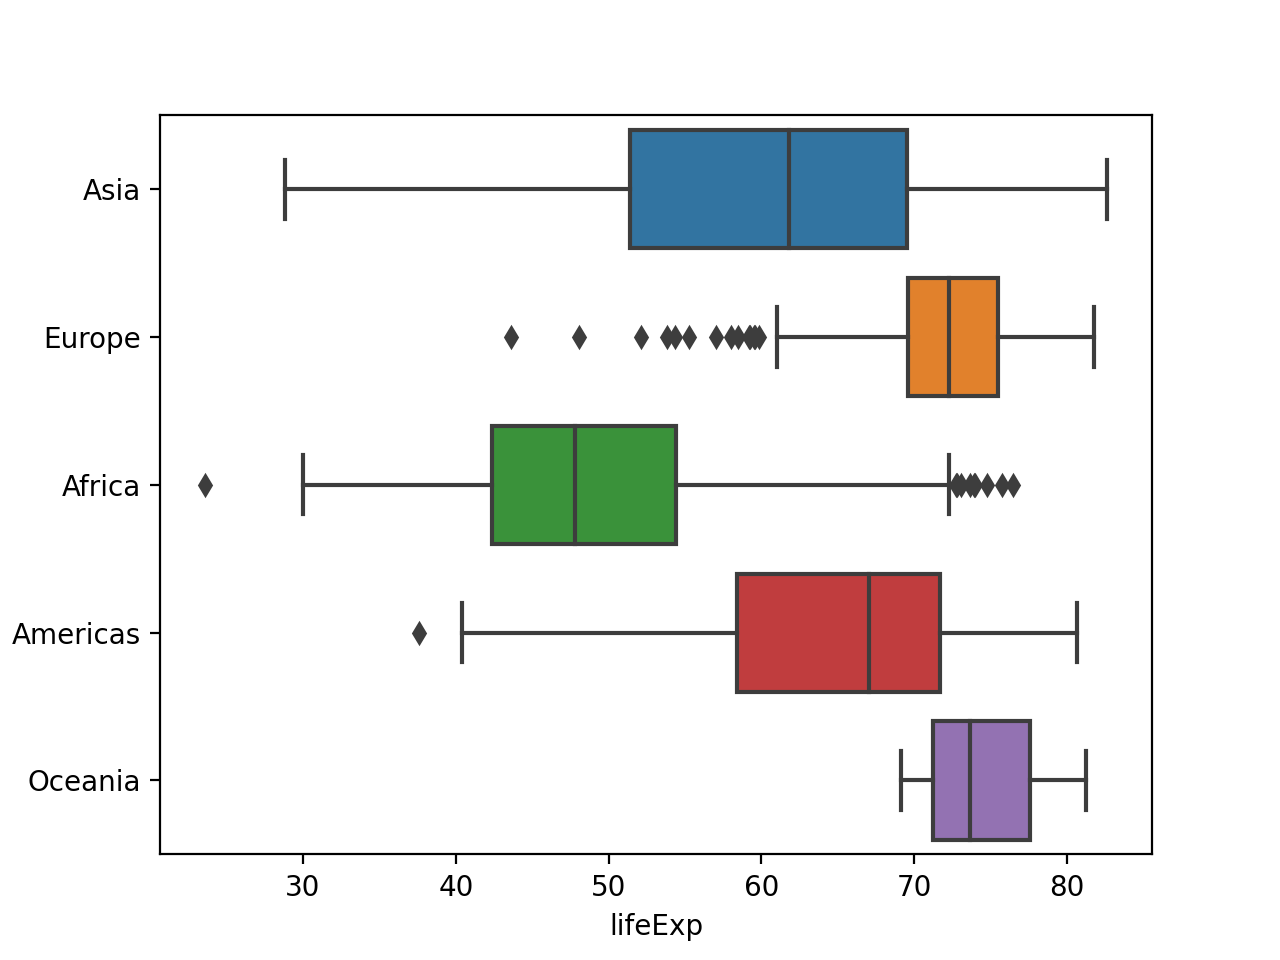

In [52]:
# Seaborn
sns.boxplot(y='continent',x = 'lifeExp',data=gapminder)

#### Violin Plot

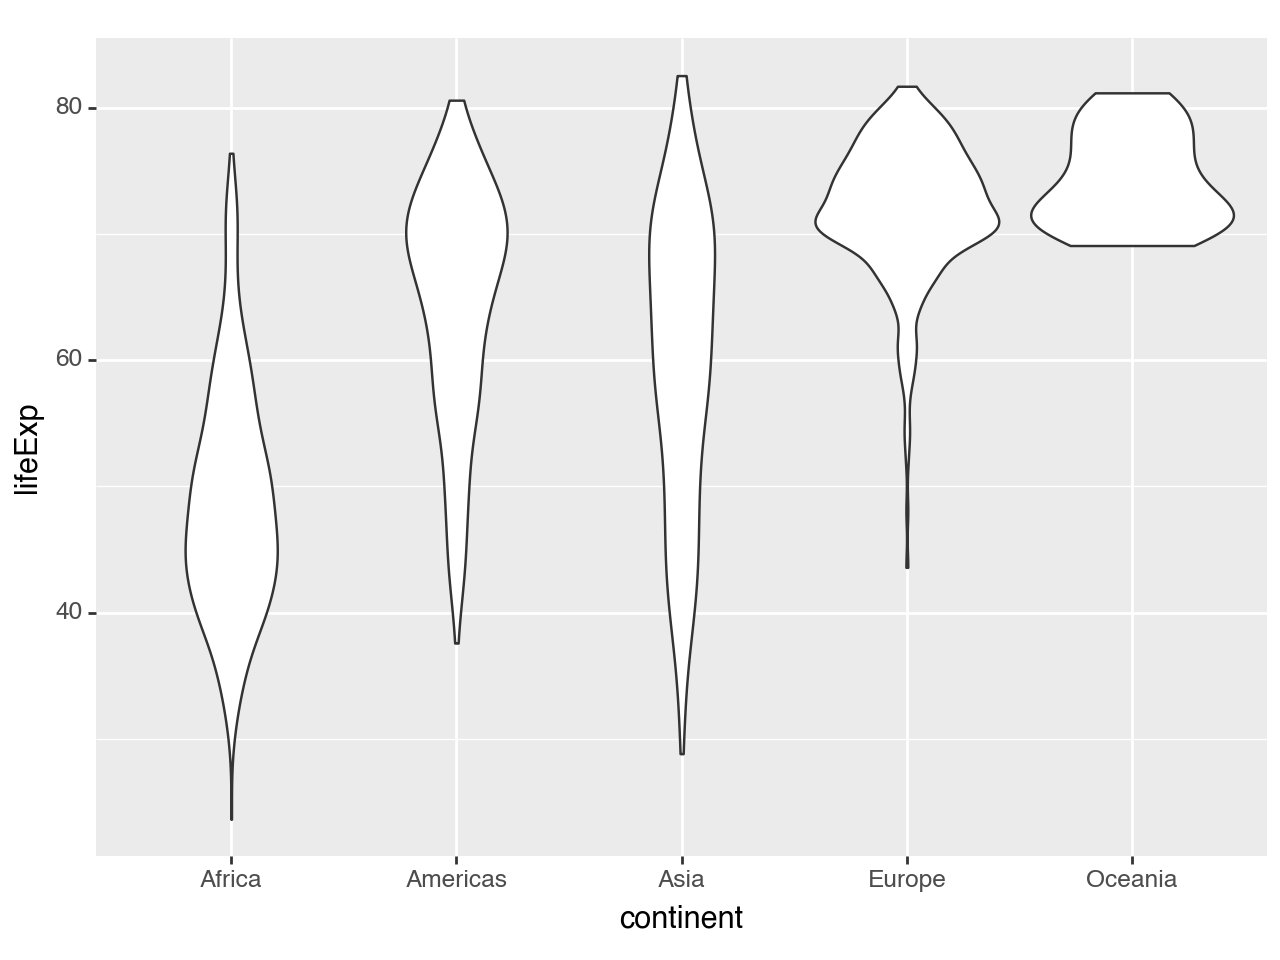

<Figure Size: (640 x 480)>

In [53]:
# ggplot
(ggplot(gapminder,aes(x='continent',y = 'lifeExp')) + 
    geom_violin())

<Axes: xlabel='continent', ylabel='lifeExp'>

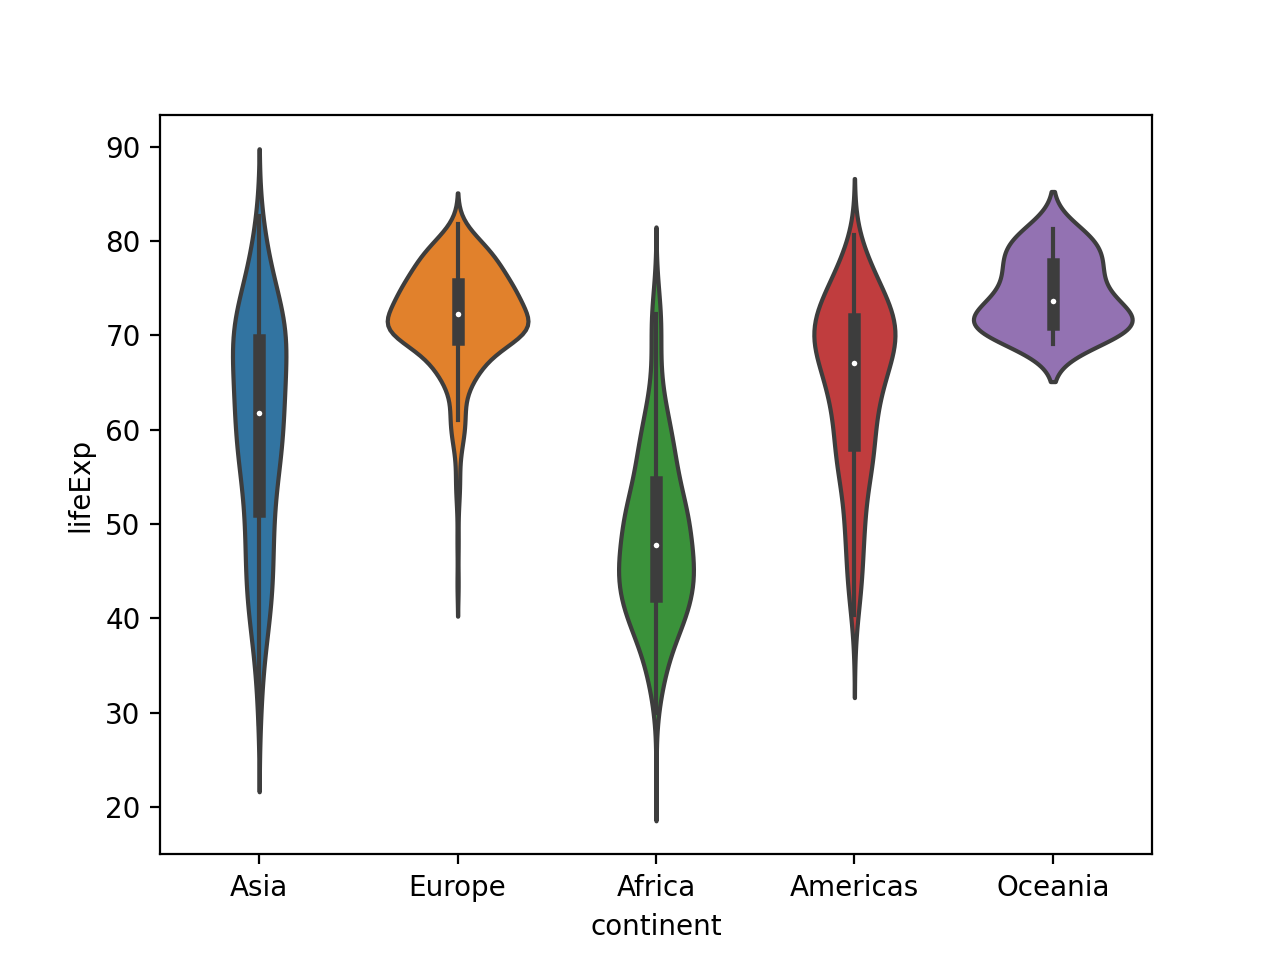

In [54]:
# Seaborn
sns.violinplot(x='continent',y = 'lifeExp',data=gapminder)

#### jitter plot

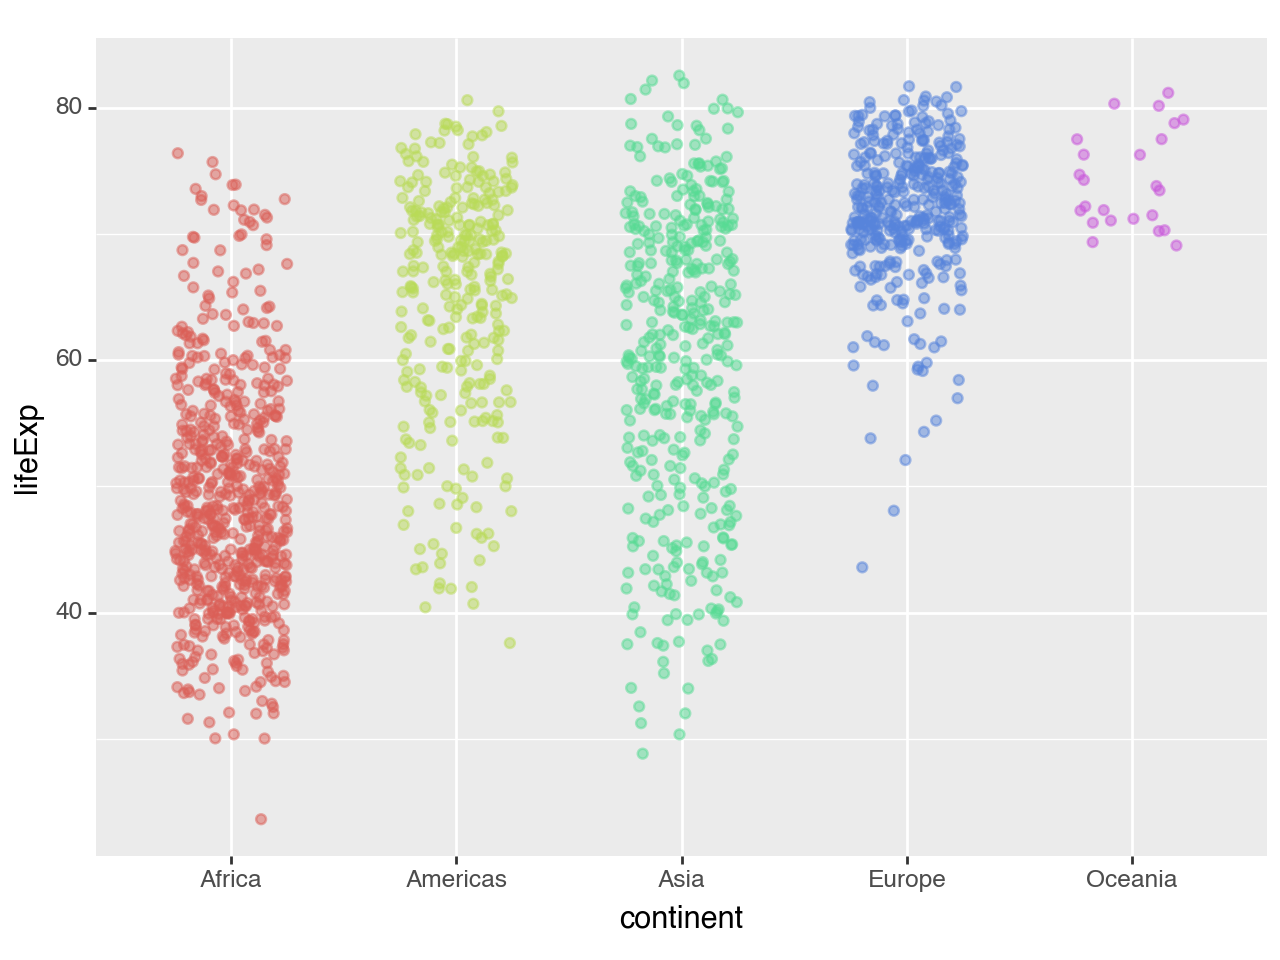

<Figure Size: (640 x 480)>

In [55]:
(ggplot(gapminder,aes(x='continent',y = 'lifeExp',color="continent")) +
  geom_jitter(width = .25,alpha=.5,show_legend=False))

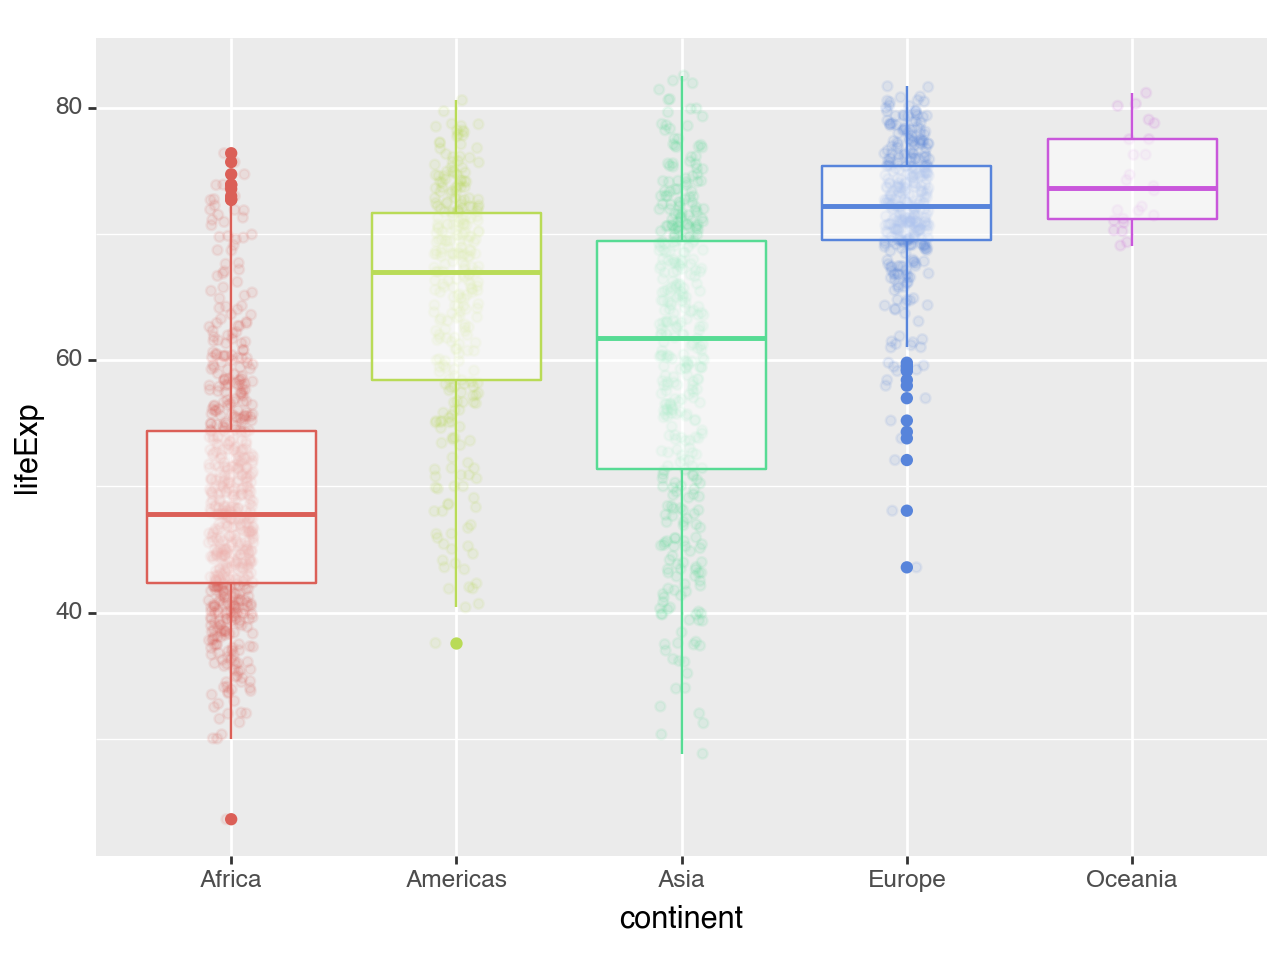

<Figure Size: (640 x 480)>

In [56]:
# Layer the representations
(ggplot(gapminder,aes(x='continent',y = 'lifeExp',color="continent")) +
  geom_jitter(width = .1,alpha=.1,show_legend=False) +
  geom_boxplot(alpha=.5,show_legend=False))

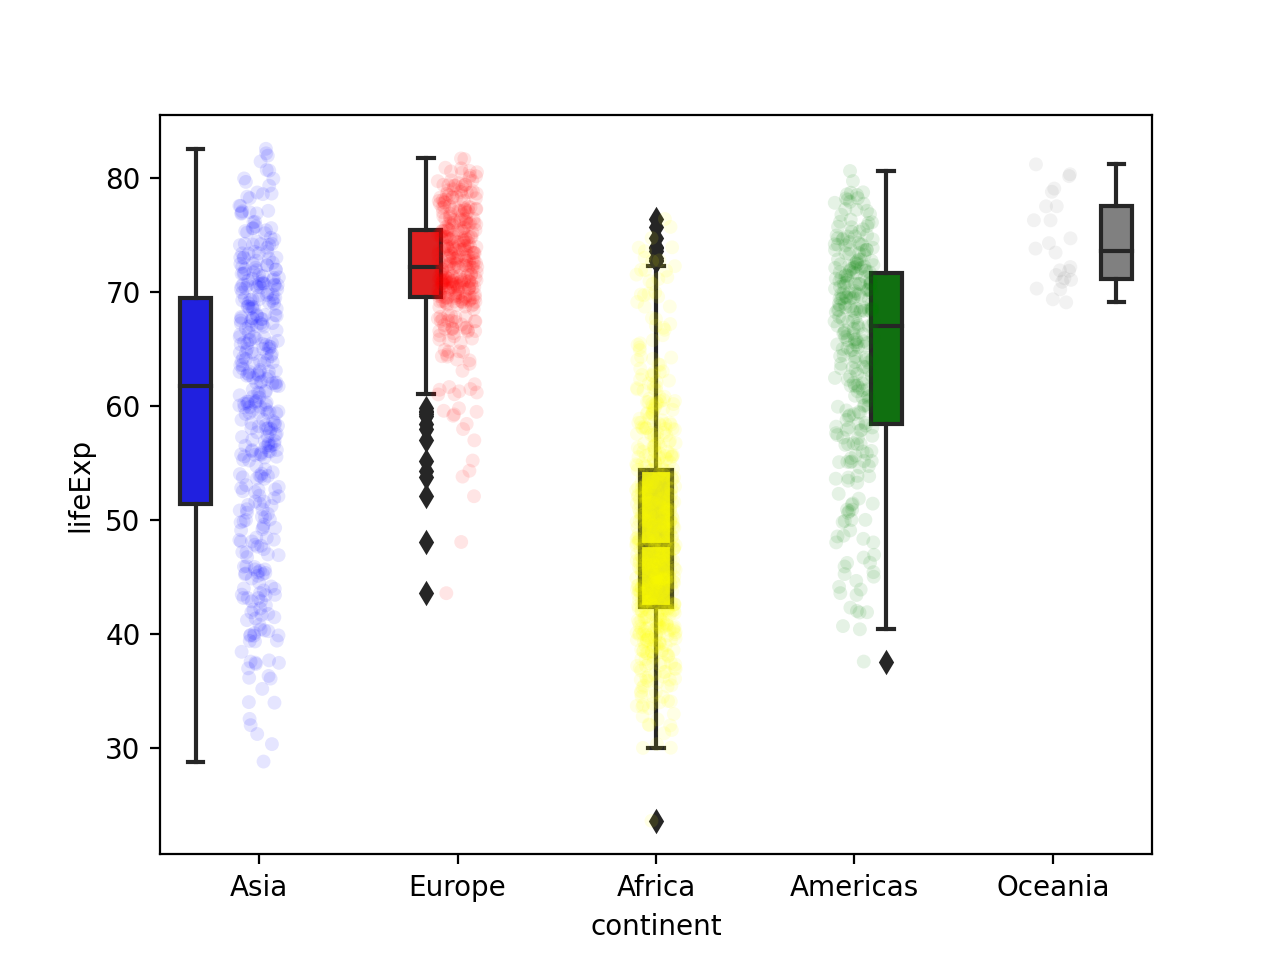

In [57]:
# Seaborn
color = {"Asia": "blue", 
         "Europe": "red", 
         "Africa": "yellow", 
         "Americas":"green", 
         "Oceania":"gray"}

# boxplot
sns.boxplot(x='continent',y = 'lifeExp', 
            hue="continent", 
            palette=color,
            data=gapminder)
# jitter
sns.stripplot(x='continent', y='lifeExp',
              data=gapminder, jitter=True, 
              alpha=0.1, hue="continent", 
             palette=color)

plt.legend([], [], frameon=False)


## Continuous Values

<div>
<img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/single-distributions-1.png" width="60%"/>
</div>

### Univariate Continuos

#### Histogram

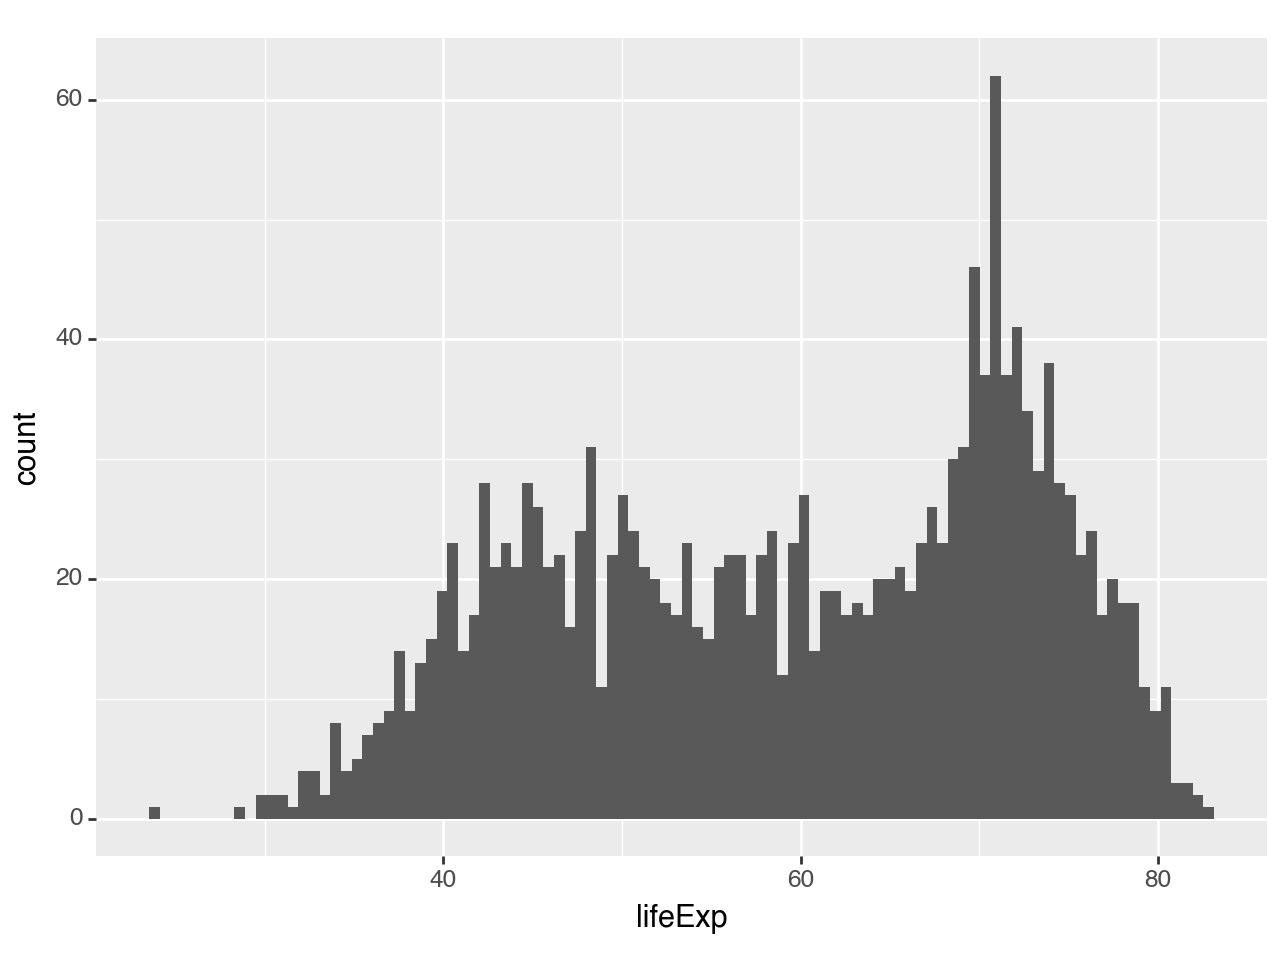

<Figure Size: (640 x 480)>

In [58]:
# plotnine/ggplot2 
(ggplot(gapminder, aes(x = 'lifeExp')) +
  geom_histogram(bins=100))

<Axes: xlabel='lifeExp', ylabel='Density'>

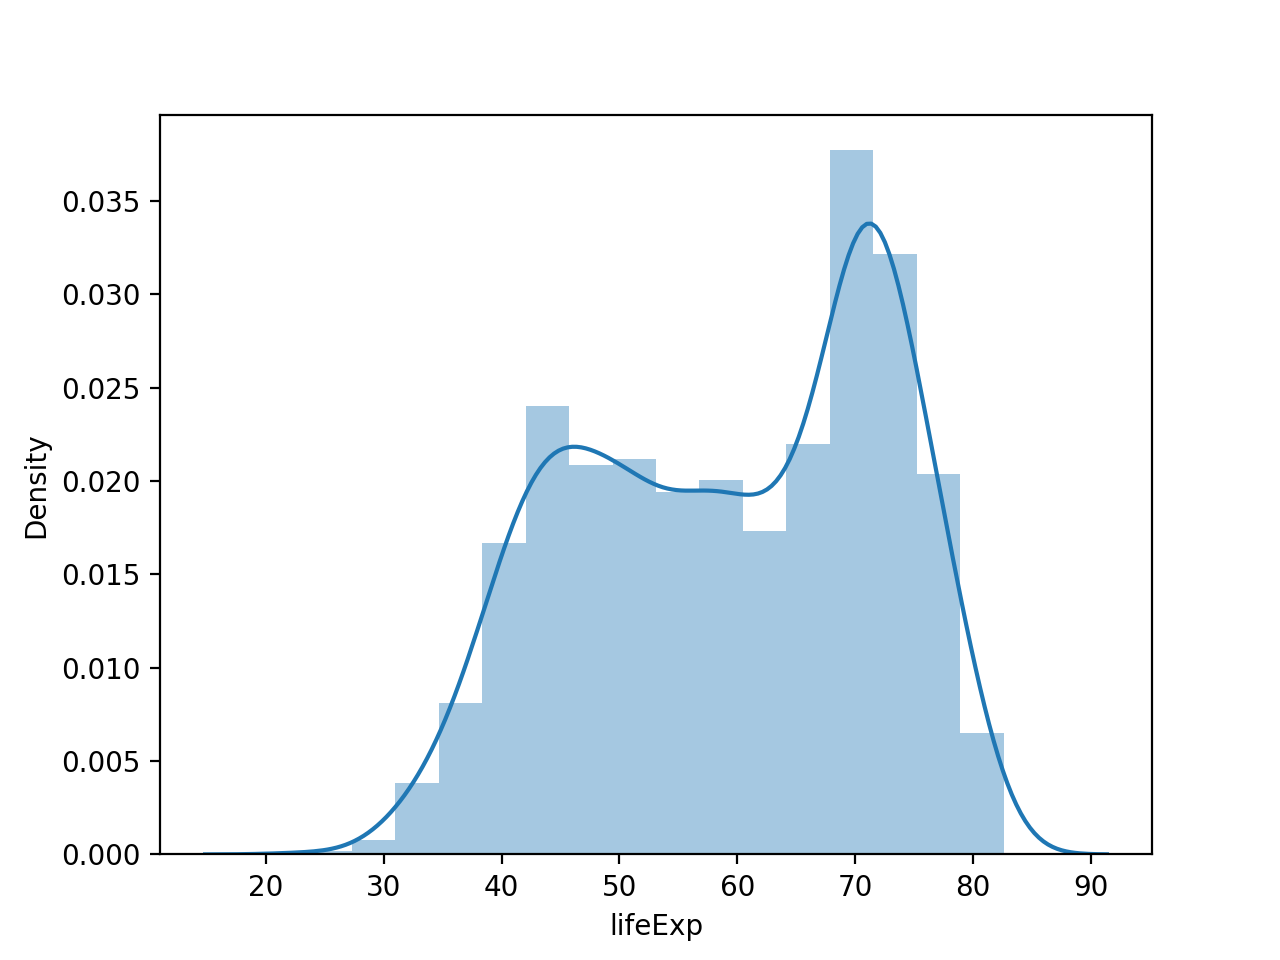

In [59]:
# Seaborn
sns.distplot(gapminder.lifeExp,hist=True,kde=True)

#### Density

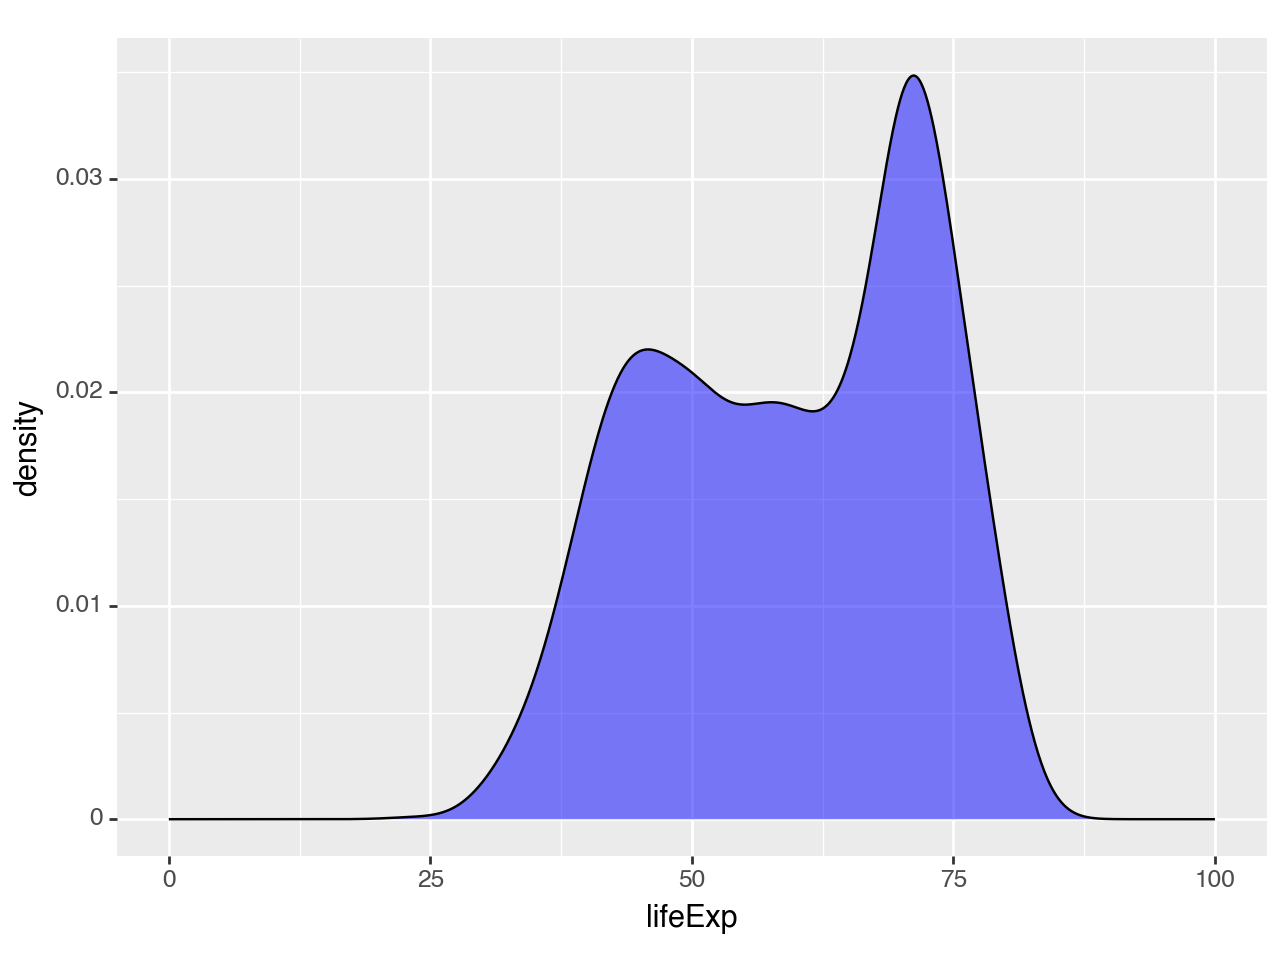

<Figure Size: (640 x 480)>

In [60]:
# plotnine/ggplot2 
(ggplot(gapminder, aes(x = 'lifeExp')) +
  geom_density(fill="blue",color="black",alpha=.5)+
  xlim(0,100))


#### Multiple Plots


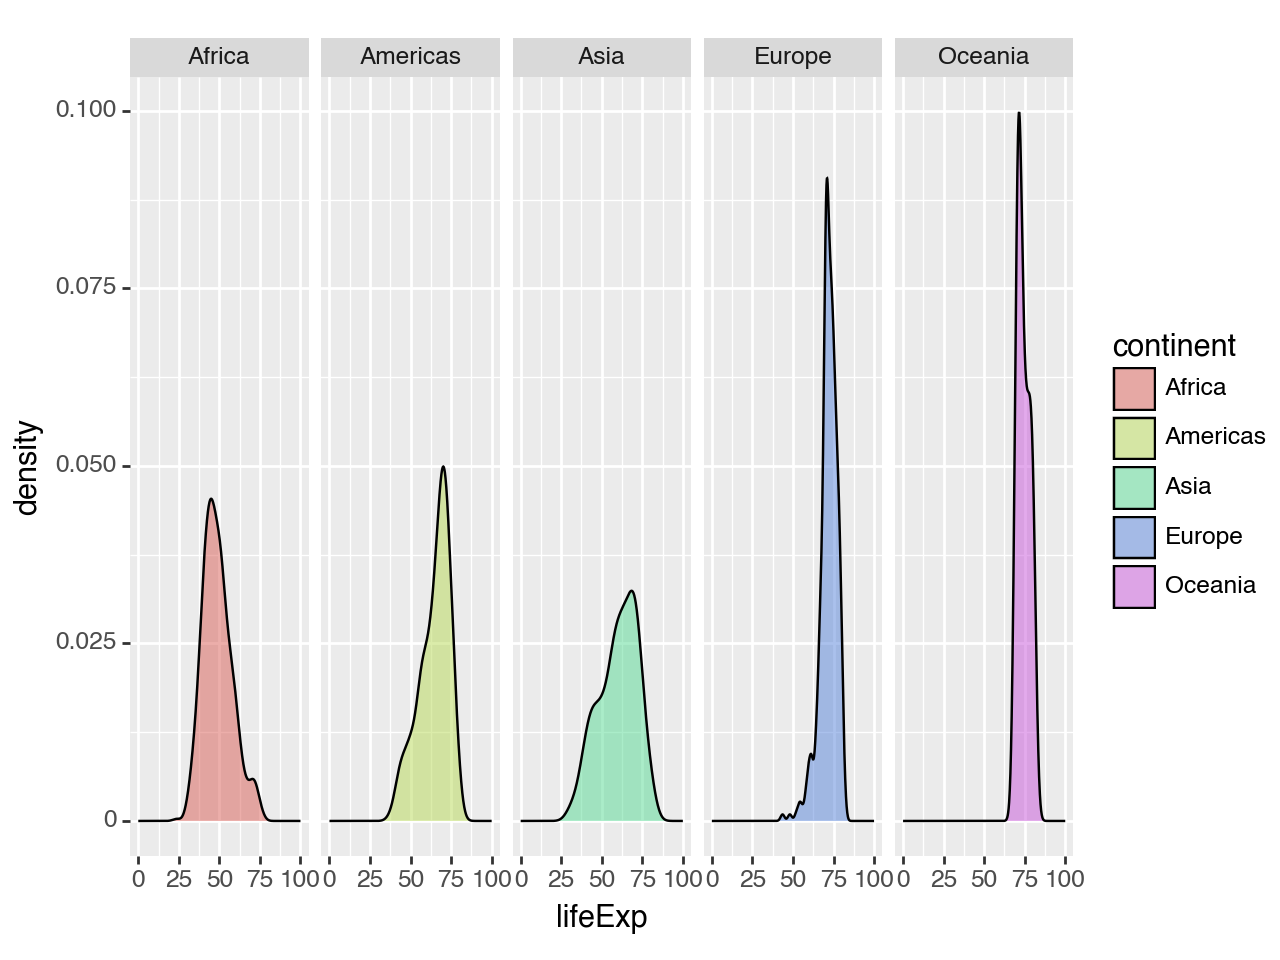

<Figure Size: (640 x 480)>

In [61]:
# plotnine/ggplot2 
(ggplot(gapminder, aes(x = 'lifeExp', fill="continent")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ continent"))

<Axes: xlabel='lifeExp', ylabel='Density'>

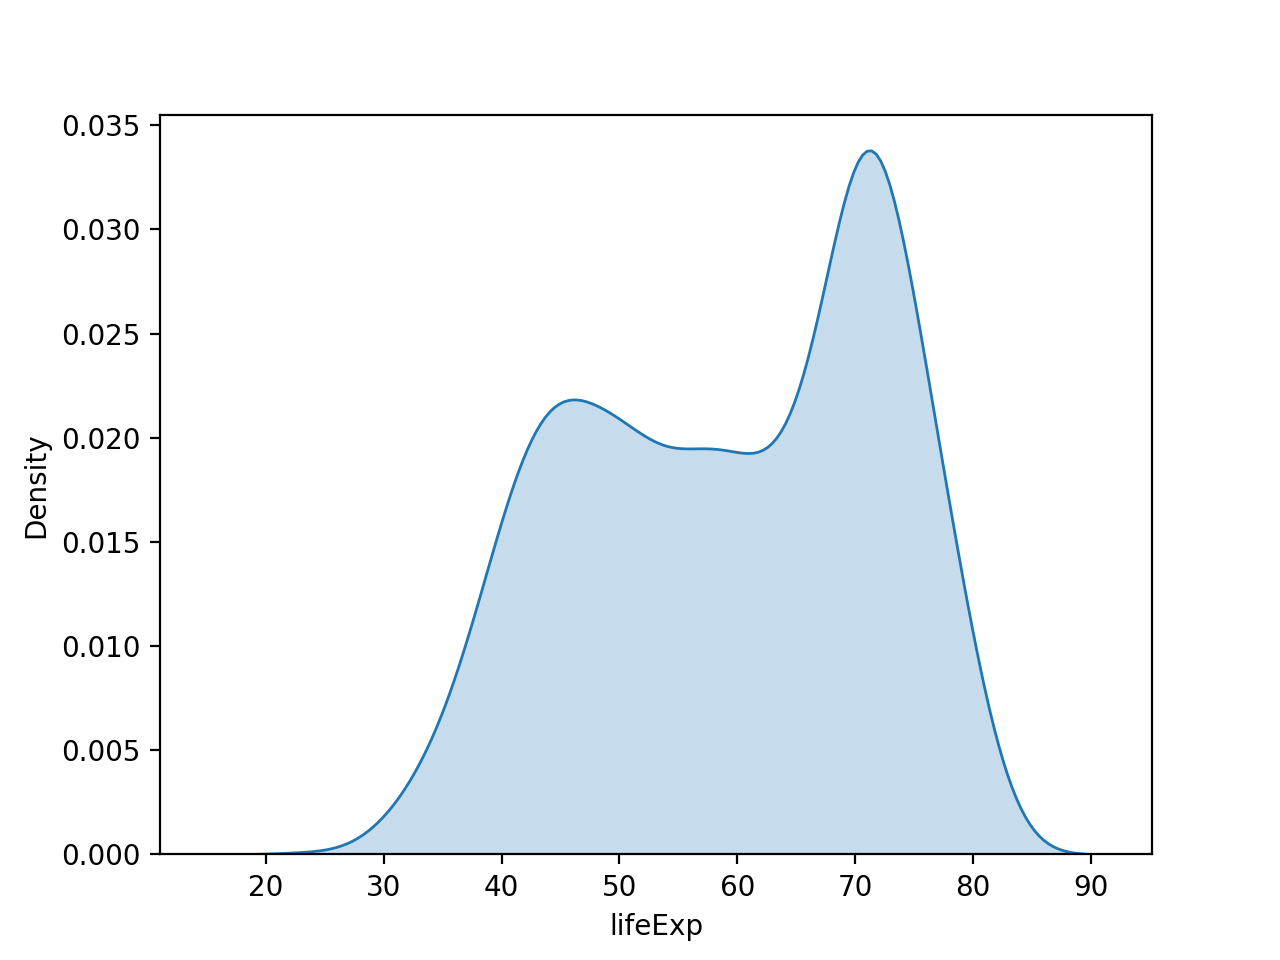

In [62]:
# Seaborn
sns.kdeplot(gapminder.lifeExp,shade=True)

### <center> Relationships </center>

<div>
<img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/basic-scatter-1.png" width="60%"/>
   <img src="https://clauswilke.com/dataviz/directory_of_visualizations_files/figure-html/xy-lines-1.png" width="60%"/></div>

### Bivariate Continuous

#### scatterplot

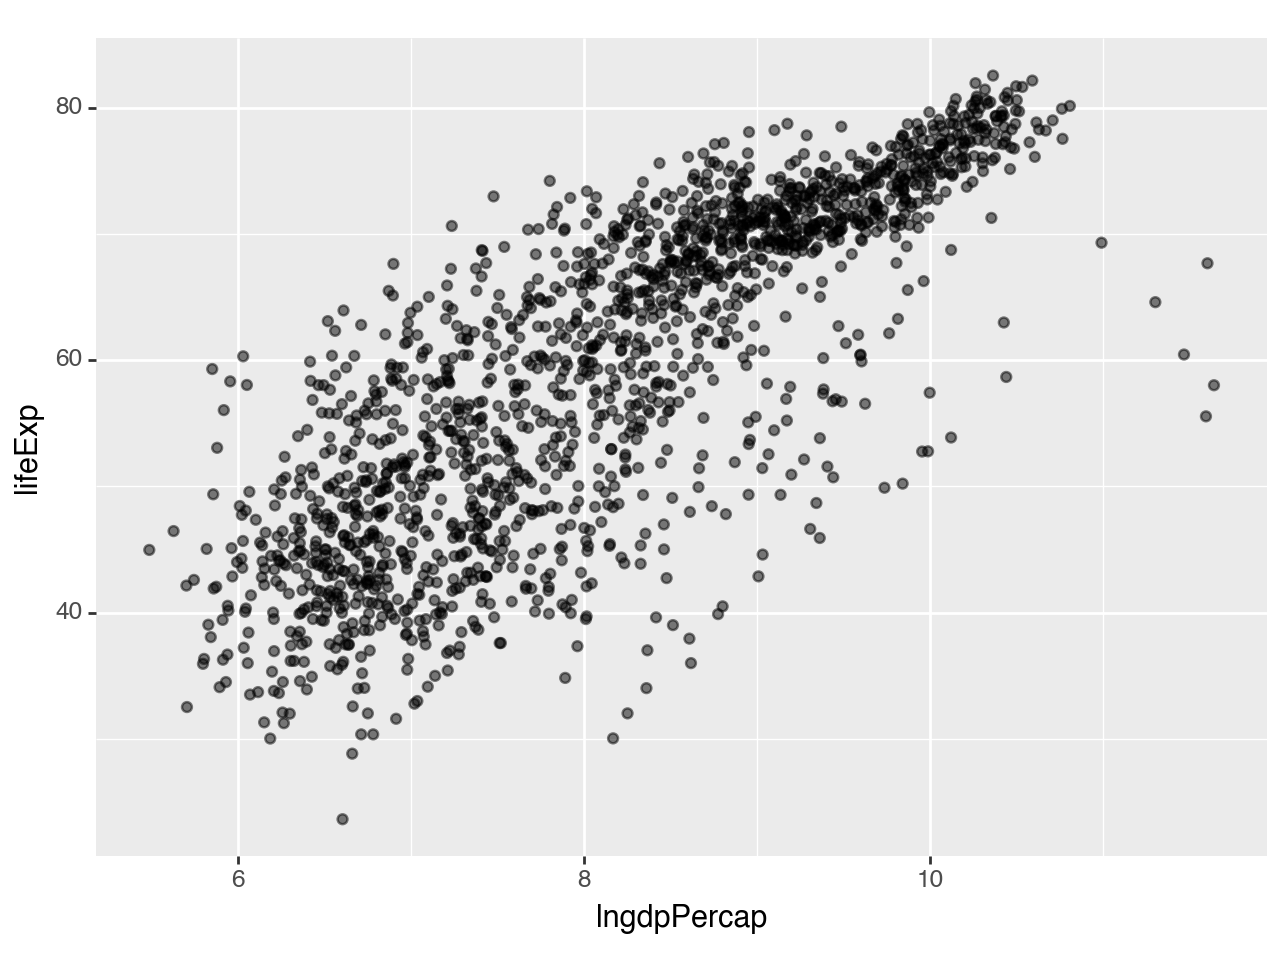

<Figure Size: (640 x 480)>

In [63]:
# plotnine/ggplot2 
(ggplot(gapminder, aes(x = 'lngdpPercap', y = 'lifeExp')) +
  geom_point(alpha=.5))

<Axes: xlabel='lngdpPercap', ylabel='lifeExp'>

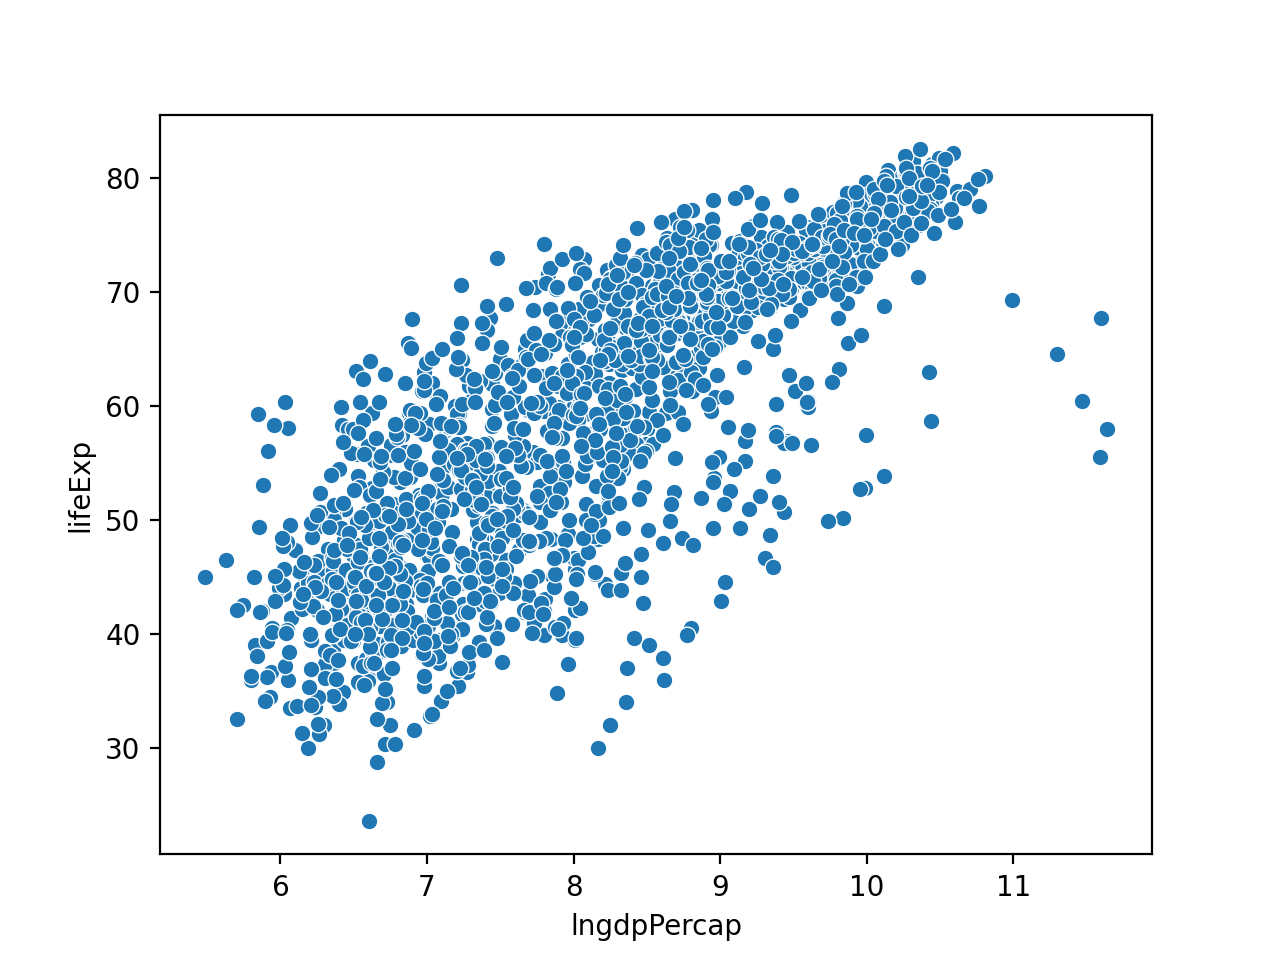

In [64]:
# Seaborn
sns.scatterplot(x = 'lngdpPercap', y = 'lifeExp',data=gapminder)

#### lineplot

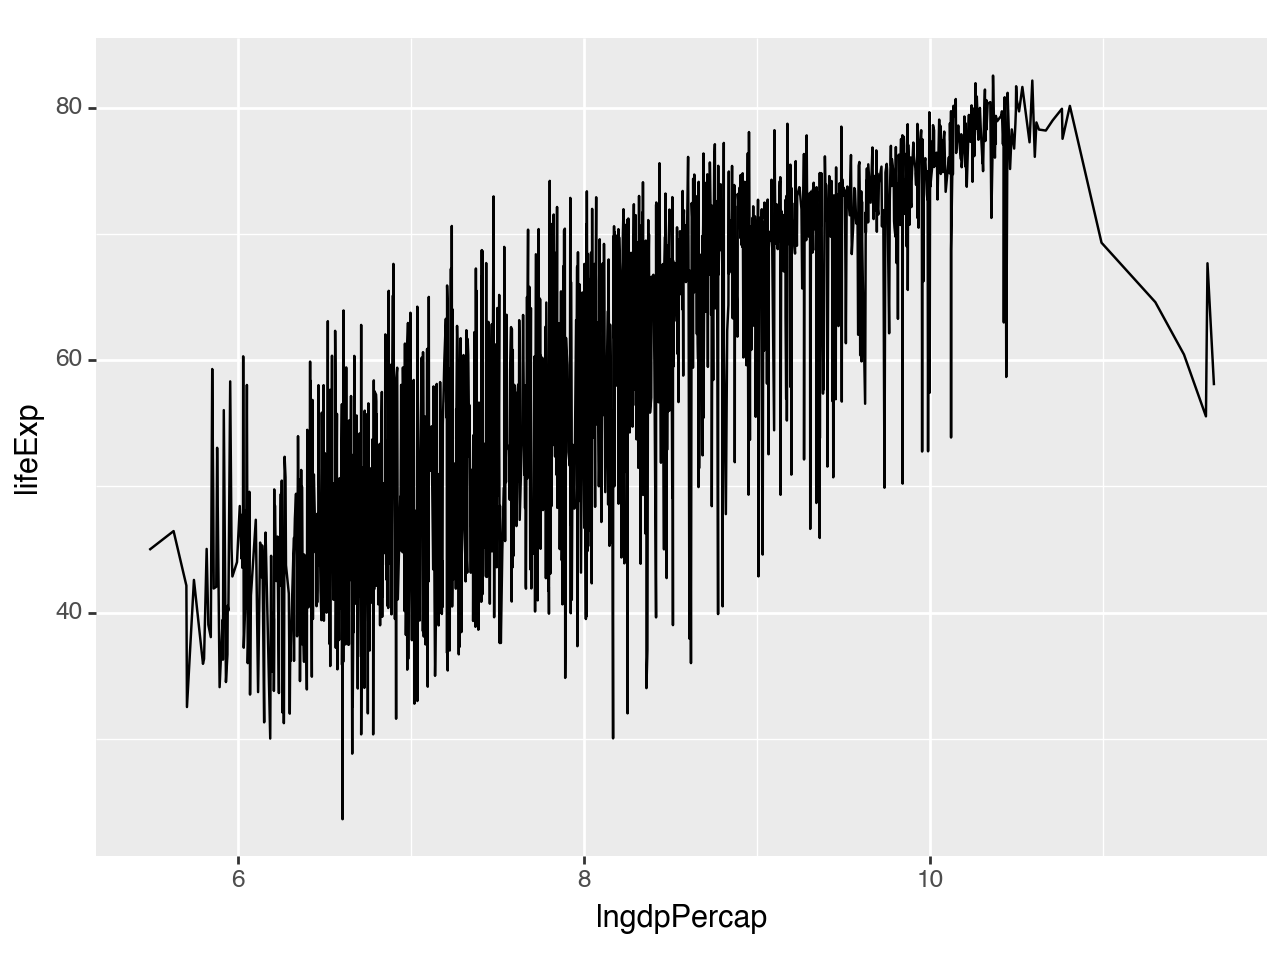

<Figure Size: (640 x 480)>

In [65]:
# plotnine/ggplot2 
(ggplot(gapminder, aes(x = 'lngdpPercap', y = 'lifeExp')) +
  geom_line())

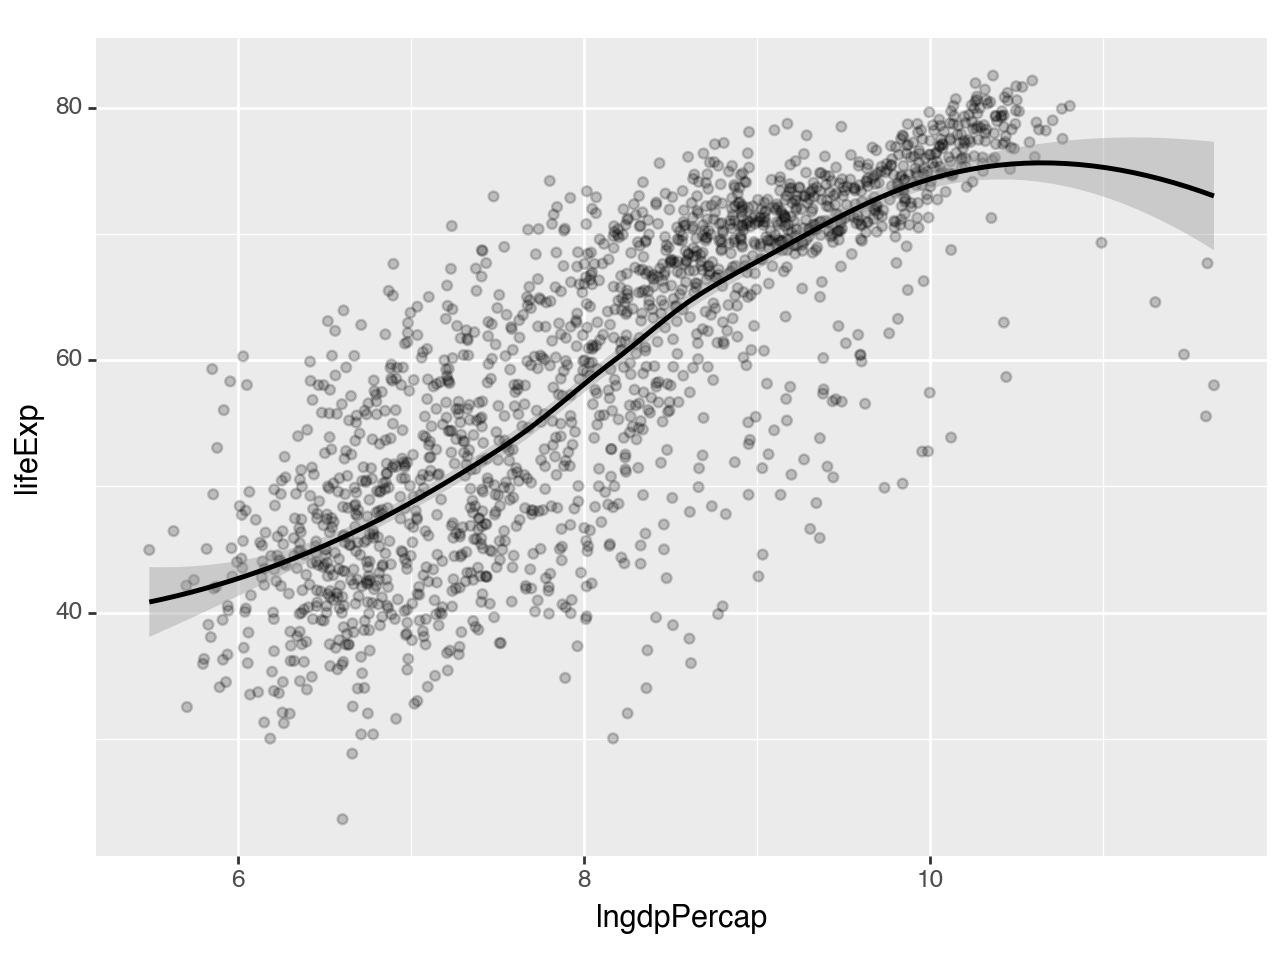

<Figure Size: (640 x 480)>

In [66]:
# easily smooth in ggplot
(ggplot(gapminder, aes(x = 'lngdpPercap', y = 'lifeExp')) +
   geom_point(alpha=.2)
    + geom_smooth(method="loess"))

<Axes: xlabel='lngdpPercap', ylabel='lifeExp'>

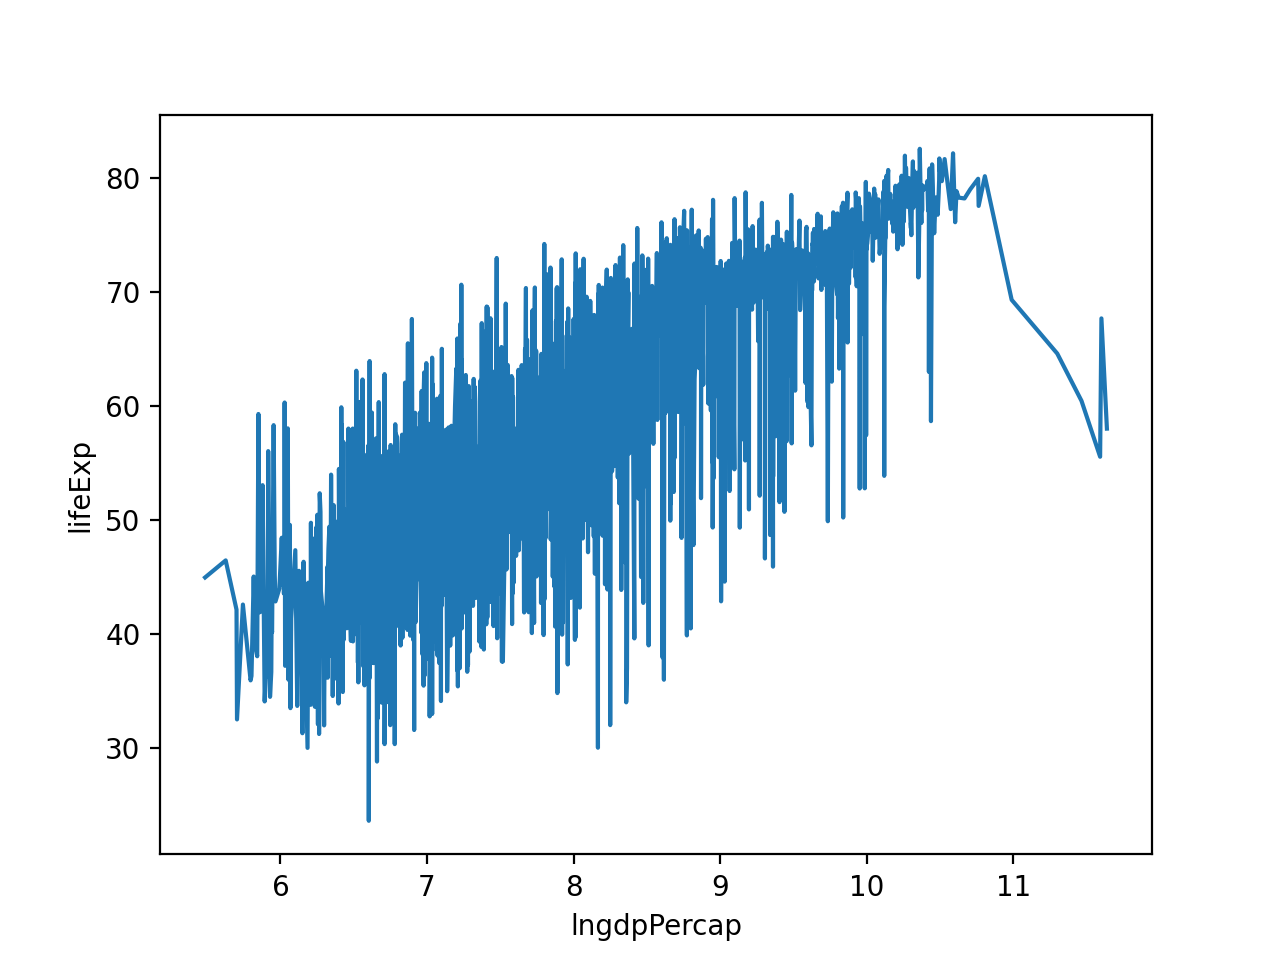

In [67]:
# Seaborn
sns.lineplot(x = 'lngdpPercap', y = 'lifeExp',data=gapminder)

## Practice

Try your best to reproduce the figure below. I generated a random sample of data for you to use. Enjoy!

<br>
<div>
<img src="global_color_to_values.png" width="80%"/>
</div>

In [18]:
# data generation
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_minimal, scale_color_manual, labs, geom_vline

# Simulation
np.random.seed(42)  # For reproducibility
n = 300
margin = np.random.uniform(-1, 1, n)  # Margin between -1 and 1
party = np.where(margin < 0, 'Non-Incumbent', 'Incumbent') 
party_ = np.where(margin < 0, 1, 0)  

# the model
vote_share = 0.2 * margin  - .2 *party_  + np.random.normal(0, 0.2, n)*abs(margin)  # Linear relationship with some noise


# Build a dataframe
df = pd.DataFrame({
    'margin': margin,
    'vote_share': vote_share,
    'party': party
})

# build your plot
df

margin  vote_share          party
0   -0.250920   -0.247897  Non-Incumbent
1    0.901429    0.062811      Incumbent
2    0.463988    0.291750      Incumbent
3    0.197317    0.064480      Incumbent
4   -0.687963   -0.616237  Non-Incumbent
..        ...         ...            ...
295  0.044487    0.009325      Incumbent
296  0.539987    0.136047      Incumbent
297 -0.568358   -0.416467  Non-Incumbent
298  0.245781    0.080547      Incumbent
299 -0.829305   -0.641442  Non-Incumbent

[300 rows x 3 columns]

In [ ]:
## Add you code!

In [20]:
!jupyter nbconvert _week-6-data-visualization.ipynb --to html --template classic

[NbConvertApp] Converting notebook _week-6-data-visualization.ipynb to html
[NbConvertApp] Writing 6698864 bytes to _week-6-data-visualization.html
